#### Import the neccessary packages

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import datetime
%matplotlib inline


Bad key "text.kerning_factor" on line 4 in
/Users/HOME/opt/anaconda3/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.1.3/matplotlibrc.template
or from the matplotlib source distribution
/Users/HOME/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


#### Load the data

In [2]:
crime_data = pd.read_csv("/Users/HOME/Desktop/LosAngelesCrime/data/datawrangling.csv",index_col = 0)
crime_data.head()

/Users/HOME/opt/anaconda3/lib/python3.7/site-packages/numpy/lib/arraysetops.py:580: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


,dr_no,date_rptd,date_occ,time_occ,area,area_name,rpt_dist_no,crm_cd,crm_cd_desc,mocodes,...,premis_desc,weapon_used_cd,weapon_desc,status,status_desc,location,lat,lon,day_crime_occ,no_rptd_occ
0,1307355,2010-02-20,2010-02-20,13:50,13,Newton,1385,900,VIOLATION OF COURT ORDER,0913 1814 2000,...,SINGLE FAMILY DWELLING,500.0,UNKNOWN WEAPON/OTHER WEAPON,AA,Adult Arrest,300 E GAGE AV,33.9825,-118.2695,Saturday,0 days 00:00:00.000000000
1,11401303,2010-09-13,2010-09-12,00:45,14,Pacific,1485,740,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",0329,...,STREET,500.0,UNKNOWN WEAPON/OTHER WEAPON,IC,Invest Cont,SEPULVEDA BL,33.9599,-118.3962,Sunday,1 days 00:00:00.000000000
2,70309629,2010-08-09,2010-08-09,15:15,13,Newton,1324,946,OTHER MISCELLANEOUS CRIME,0344,...,ALLEY,500.0,UNKNOWN WEAPON/OTHER WEAPON,IC,Invest Cont,1300 E 21ST ST,34.0224,-118.2524,Monday,0 days 00:00:00.000000000
3,90631215,2010-01-05,2010-01-05,01:50,6,Hollywood,646,900,VIOLATION OF COURT ORDER,1100 0400 1402,...,STREET,102.0,HAND GUN,IC,Invest Cont,CAHUENGA BL,34.1016,-118.3295,Tuesday,0 days 00:00:00.000000000
4,100100501,2010-01-03,2010-01-02,21:00,1,Central,176,122,"RAPE, ATTEMPTED",0400,...,ALLEY,400.0,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",IC,Invest Cont,8TH ST,34.0387,-118.2488,Saturday,1 days 00:00:00.000000000


In [3]:
crime_data.shape

(2114451, 24)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f83ed609650>,
      dtype=object)

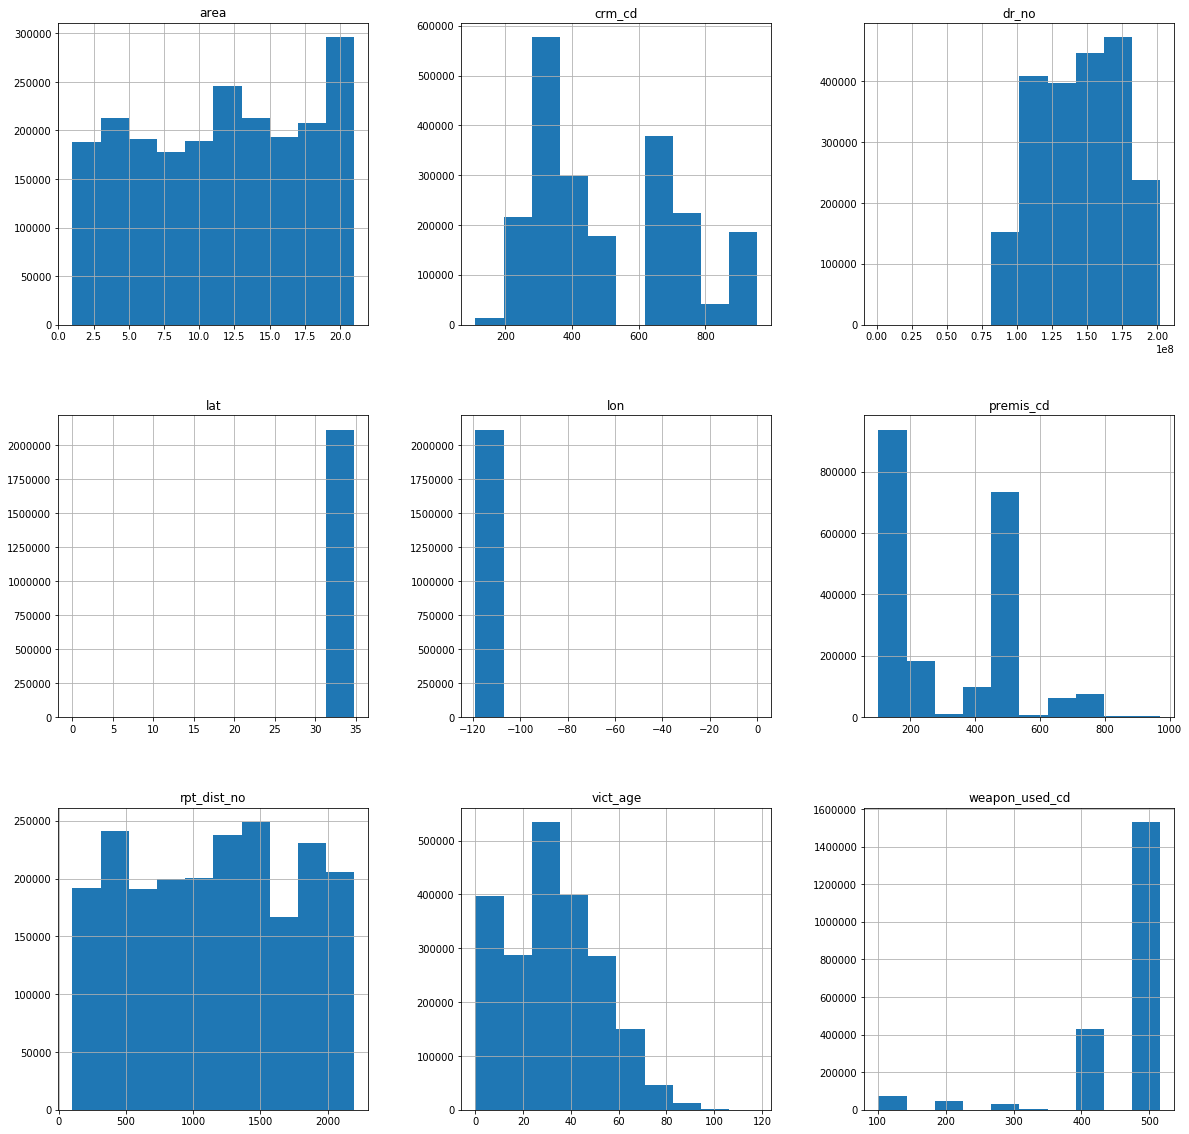

In [4]:
#Histograms for all numeric features
crime_data.hist(figsize=(20,20))

#### LA neighborhoods with their crime counts

First lets explore the LA neighborhoods and their crime counts to know which neighborhood is hot hub to crimes.

Text(0.5, 1.0, 'Crimes in LA by Area')

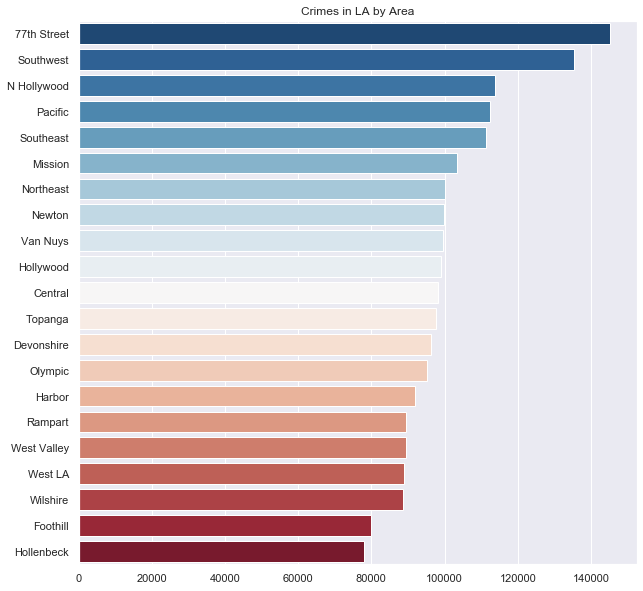

In [7]:
#Crimes by Area
sns.set(style="darkgrid")
f, ax = plt.subplots(figsize=(10, 10))
Area = pd.DataFrame(crime_data.area_name.value_counts())
name = list(Area.index)
values = list(Area.area_name)
sns.barplot(y = name,x = values,palette="RdBu_r")
ax.set_title("Crimes in LA by Area")

From the above plot, 77th Street is the primary area in LA for crimes.

As we can see the 5 most crime occuring areas are

    77th Street,Southwest,N Hollywood,Pacific,Southeast 
AND the 5 least crime occuring areas are

    Hollenbeck,Foothill,Wilshire,West LA,West Valley.

In [3]:
#Now we will see trends of crimes in LA neighborhood year by year
def plotyear(crimeyear):
    year = pd.to_datetime(crime_data['date_occ']).dt.year
    data = crime_data[year == crimeyear]
    result = data.area_name.value_counts()
    plt.figure(figsize = (8,8))
    r = plt.plot(result.sort_index())
    plt.xticks(rotation=90)
    plt.title("Yearly crimes in LA Neighborhood")
    
    return r

In [4]:
from ipywidgets import interact,widgets
interact(plotyear,crimeyear = widgets.IntSlider(min = 2010,max = 2019,step=1,value=2015))

interactive(children=(IntSlider(value=2015, description='crimeyear', max=2019, min=2010), Output()), _dom_clas…

<function __main__.plotyear(crimeyear)>

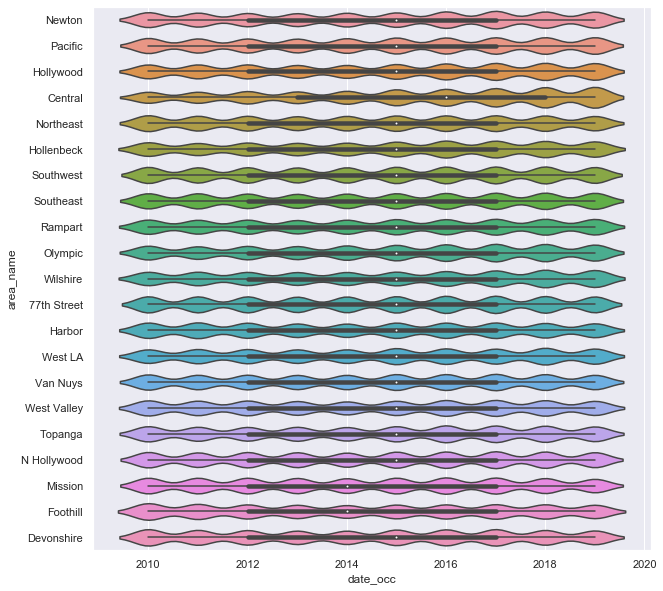

In [10]:
#Visualize crimes in LA neighborhood year by year
plt.figure(figsize = (10,10))
sns.violinplot(x = pd.to_datetime(crime_data['date_occ']).dt.year,
            y = 'area_name',data = crime_data)

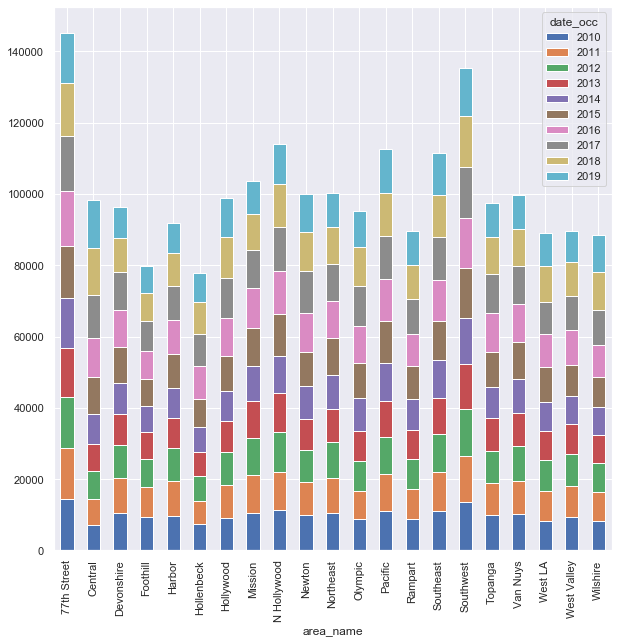

In [23]:
#Yearly Contribution of crimes in each neighborhood
area_year = crime_data.groupby(['area_name', pd.to_datetime(crime_data['date_occ']).dt.year]).size().reset_index().pivot(columns='date_occ', index='area_name', values=0)
area_year.plot(kind = 'bar',stacked = True,figsize=(10,10))


#### Crime Density in LA neighborhoods

In [5]:
# Crime density in each LA neighborhood

import geopandas
df1 = geopandas.read_file("/Users/HOME/Desktop/LosAngelesCrime/LAPD_Reporting_Districts.shp")
def plot_crime_density(crimeyear):
    year = pd.to_datetime(crime_data['date_occ']).dt.year
    data = pd.DataFrame(crime_data[year == crimeyear].area_name.value_counts())
    data.index = map(lambda x: str(x).upper(), data.index)
    merged = df1.set_index('APREC').join(data)
    fig, ax = plt.subplots(figsize = (15,8))

    xlim = ([merged.total_bounds[0],  merged.total_bounds[2]])
    ylim = ([merged.total_bounds[1],  merged.total_bounds[3]])

    ax.set_xlim(xlim)
    ax.set_ylim(ylim)

    merged.plot(column = 'area_name',ax = ax,legend = True,cmap="YlOrRd")

    ax.set(title='LOSANGELES')
    ax.set_axis_off()

    plt.show()
    print("The highest 5 crime areas:", data.head())
    print("The lowest 5 crime area:", data.tail())
    
# Crime density in each LA neighborhood
from ipywidgets import interact,widgets
interact(plot_crime_density,crimeyear = widgets.IntSlider(min = 2010,max = 2019,step=1,value=2015))

interactive(children=(IntSlider(value=2015, description='crimeyear', max=2019, min=2010), Output()), _dom_clas…

<function __main__.plot_crime_density(crimeyear)>

#### Now we will see how are the crime trends over the years

#### YEAR OF CRIME

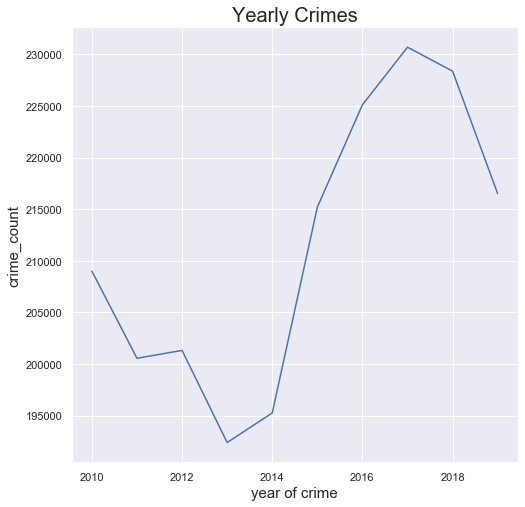

In [14]:
#Yearly crimes
plt.figure(figsize = (8,8))
sns.set(style="darkgrid")
year = pd.to_datetime(crime_data['date_occ']).dt.year
trend = crime_data.groupby(year).count()
sns.lineplot(x = trend.index,y=trend.date_occ,data = trend,
                  palette = "hot", dashes = True,markers = "o" )
 
plt.title("Yearly Crimes", fontsize = 20)
plt.xlabel("year of crime", fontsize = 15)
plt.ylabel("crime_count", fontsize = 15)
plt.show()


Text(0.5, 1, 'Crimes per year')

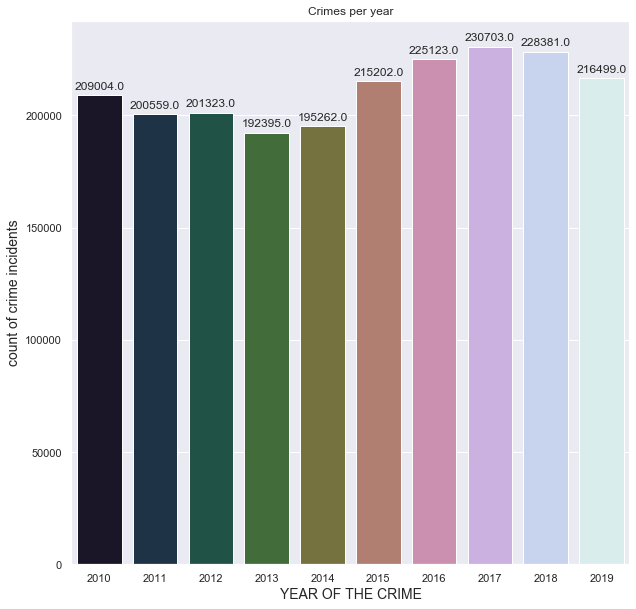

In [15]:
year = crime_data.groupby(pd.to_datetime(crime_data['date_occ']).dt.year).count()
year = year.sort_values(by='area',ascending=False)

f, ax = plt.subplots(figsize=(10, 10))
crime_year = list(year.index)
crime_count = list(year.date_occ)
splot = sns.barplot(x = crime_year,y = crime_count,data = year,palette="cubehelix")
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.1f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')
plt.xlabel("YEAR OF THE CRIME", size=14)
plt.ylabel("count of crime incidents", size=14)
plt.savefig("add_text_to_top_of_bars_in_barplot_Seaborn_Python.png")
ax.set_title("Crimes per year")


From the above plot it is evident that 2017 had highest crimes.Now lets check in which month highest crimes occured.

#### MONTH OF CRIME

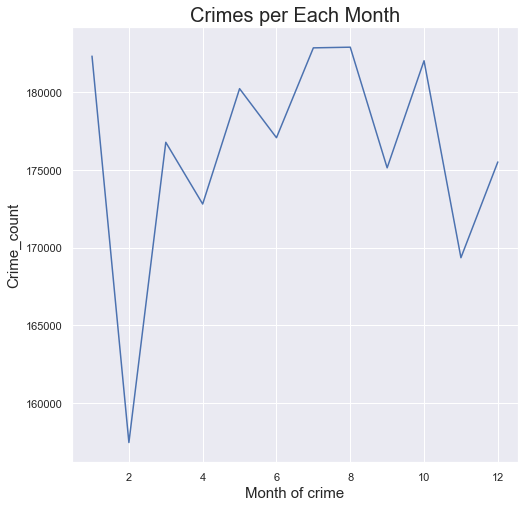

In [16]:
#Monthly crime occurances
plt.figure(figsize = (8,8))
sns.set(style="darkgrid")
month = pd.to_datetime(crime_data['date_occ']).dt.month
trend = crime_data.groupby(month).count()
sns.lineplot(x = trend.index,y=trend.date_occ,data = trend,
                  palette = "hot", dashes = True,markers = "o" )
 
plt.title("Crimes per Each Month", fontsize = 20)
plt.xlabel("Month of crime", fontsize = 15)
plt.ylabel("Crime_count", fontsize = 15)
plt.show()

Text(0.5, 1.0, 'Crimes per Each Month')

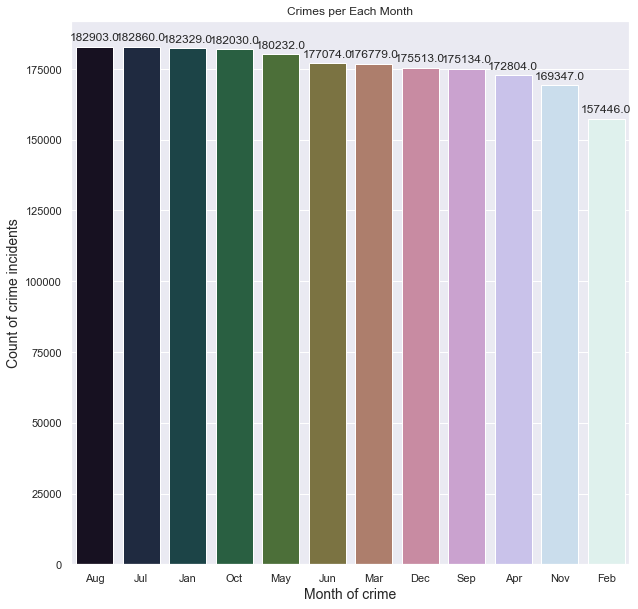

In [17]:
#Plot monthly crime count 
month = crime_data.groupby(pd.to_datetime(crime_data['date_occ']).dt.month_name().str.slice(stop=3)).count()
month = month.sort_values(by='area',ascending=False)
f, ax = plt.subplots(figsize=(10, 10))
crime_month = list(month.index)
crime_count = list(month.date_occ)
splot = sns.barplot(x = crime_month,y = crime_count,data = month,palette="cubehelix")
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.1f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')
plt.xlabel("Month of crime", size=14)
plt.ylabel("Count of crime incidents", size=14)
ax.set_title("Crimes per Each Month")



As we can see clearly AUGUST has the highest crimes. And  Nov, Feb were having the lowest crimes.Now lets see at which day of month, more crimes happened.

#### DAY OF MONTH CRIME

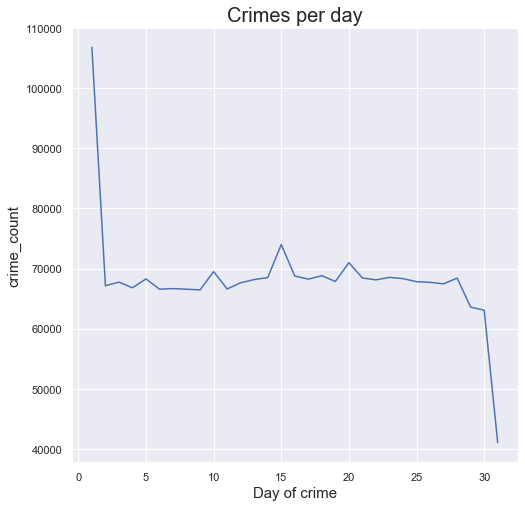

In [18]:
#Crime occurances day by day
plt.figure(figsize = (8,8))
sns.set(style="darkgrid")
day = pd.to_datetime(crime_data['date_occ']).dt.day
trend = crime_data.groupby(day).count()
sns.lineplot(x = trend.index,y=trend.date_occ,data = trend,
                  palette = "hot", dashes = True,markers = "o" )
 
plt.title("Crimes per day", fontsize = 20)
plt.xlabel("Day of crime", fontsize = 15)
plt.ylabel("crime_count", fontsize = 15)
plt.show()

Intrestingly ,We can see that more crimes occur mostly at 1st day or start of the month and least occur at last day of the month.
Now we will check at which day of the week the most crimes happened.

#### DAY OF WEEK CRIME

Text(0.5, 1.0, 'Crimes in days of the week')

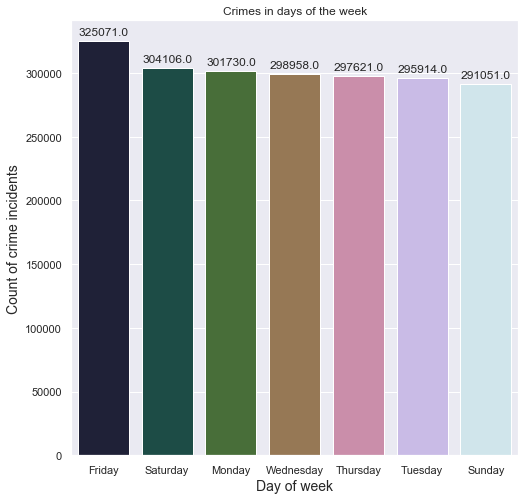

In [21]:
f, ax = plt.subplots(figsize=(8,8))
day = crime_data.groupby('day_crime_occ').count()
day = day[['date_occ']].sort_values('date_occ',ascending = False)
crime_day = list(day.index)
crime_count = list(day.date_occ)
splot = sns.barplot(x = crime_day,y = crime_count,data = day,palette="cubehelix")
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.1f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')
plt.xlabel("Day of week", size=14)
plt.ylabel("Count of crime incidents", size=14)
ax.set_title("Crimes in days of the week")

Friday and Sunday have the most crimes and least crimes respectively.Now lets see at what time most and least of the crimes occur.

#### TIME OF CRIME

Text(0.5, 1.0, 'Time of Most Crimes ')

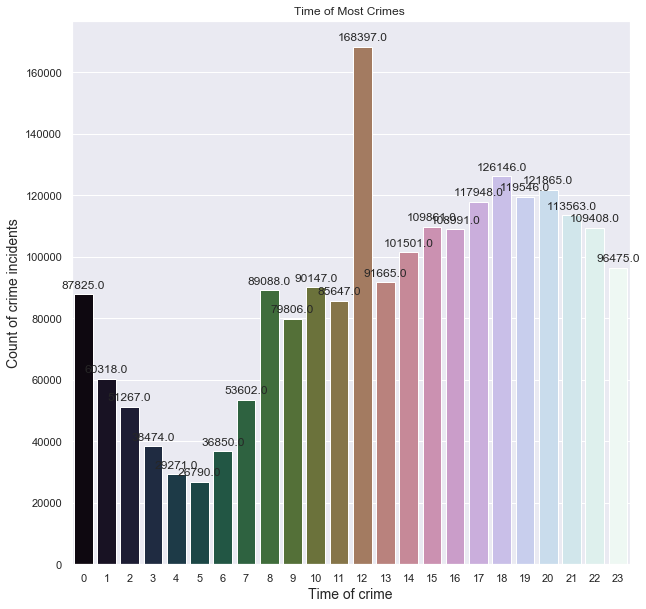

In [11]:
hour = pd.to_numeric(crime_data['time_occ'].apply(lambda x : x[:2]))
#Time at which most of the crimes occur
most_time = crime_data.groupby(pd.to_numeric(crime_data['time_occ'].apply(lambda x : x[:2]))).count().sort_values('date_occ',ascending = False)
#least_time = crime_data.groupby('time_occ').count().sort_values('date_occ',ascending = False).tail(10)

f, ax = plt.subplots(figsize=(10,10))
time = list(most_time.index)
crime_count = list(most_time.date_occ)
splot = sns.barplot(x = time,y = crime_count,data = most_time,palette="cubehelix")
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.1f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')
plt.xlabel("Time of crime", size=14)
plt.ylabel("Count of crime incidents", size=14)
plt.title("Time of Most Crimes ")

Text(0.5, 1.0, 'Time of Most Crimes ')

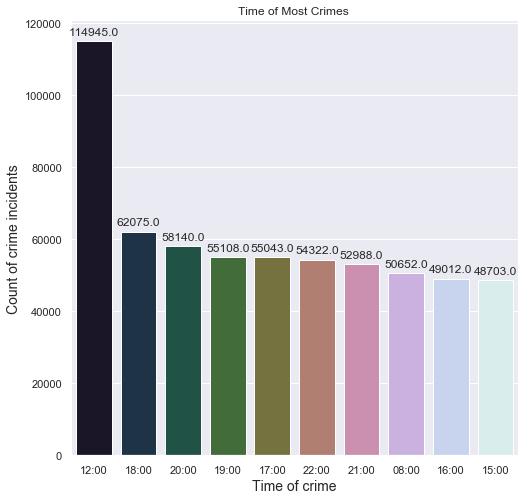

In [25]:
#Time at which most of the crimes occur
most_time = crime_data.groupby('time_occ').count().sort_values('date_occ',ascending = False).head(10)
least_time = crime_data.groupby('time_occ').count().sort_values('date_occ',ascending = False).tail(10)

f, ax = plt.subplots(figsize=(8,8))
time = list(most_time.index)
crime_count = list(most_time.date_occ)
splot = sns.barplot(x = time,y = crime_count,data = most_time,palette="cubehelix")
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.1f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')
plt.xlabel("Time of crime", size=14)
plt.ylabel("Count of crime incidents", size=14)
plt.title("Time of Most Crimes ")

It is clearly visible that most crimes occur at midday (12:00).Wonder why criminal do crimes at midday rather than night.

Text(0.5, 1, 'Time of least Crimes ')

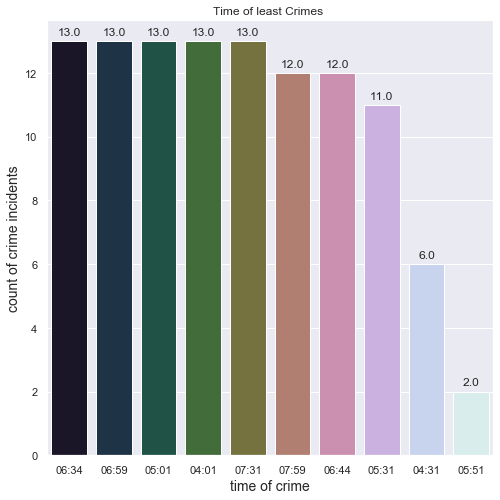

In [26]:
#Time at which crimes occur less times
f, ax = plt.subplots(figsize=(8,8))
time = list(least_time.index)
crime_count = list(least_time.date_occ)
splot = sns.barplot(x = time,y = crime_count,data = least_time,palette="cubehelix")
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.1f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')
plt.xlabel("time of crime", size=14)
plt.ylabel("count of crime incidents", size=14)
plt.savefig("add_text_to_top_of_bars_in_barplot_Seaborn_Python.png")
plt.title("Time of least Crimes ")

Least crimes occure at around 4:00 to 8:00.May be because criminals wakeup at this time and getting ready for midday crimes.

Now lets check out what type of crimes occur at 12:00 clock because most crimes occur at that only.

For that first we need to check crime types.

#### TYPES OF CRIME

Since it has total above 140 crime types,we are going to check only the first top 10 crime types. 

Text(0.5, 1, 'Crime Types')

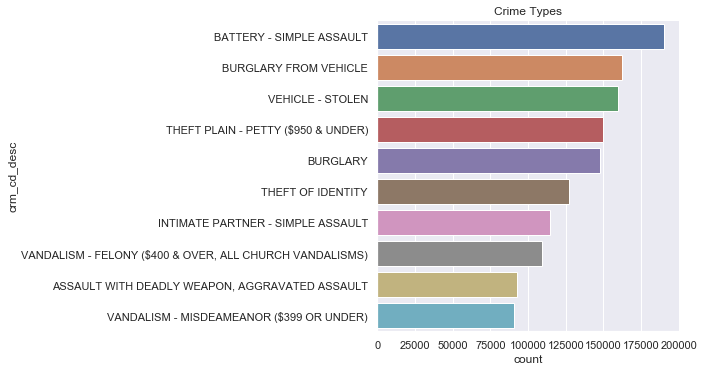

In [13]:
#High frequency crime types
sns.catplot(y = 'crm_cd_desc',kind = 'count',
            data = crime_data,order = crime_data['crm_cd_desc'].value_counts().iloc[:10].index)
plt.title("Crime Types")

"BATTERY - SIMPLE ASSAULT" is the top most primary crime type which occurs very frequently in LA neighborhoods.
Now lets see the very less frequently occuring crime types i.e the least 10 crimetypes.

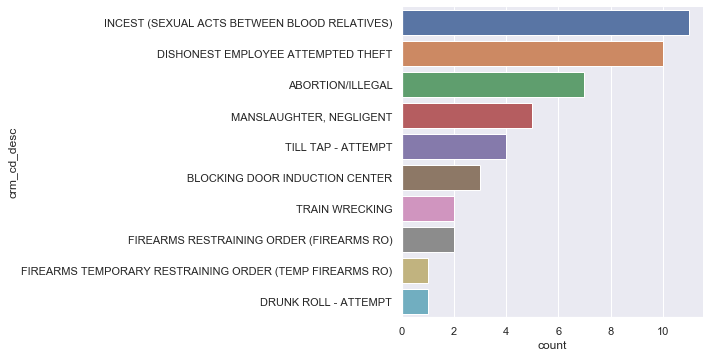

In [32]:
#Low frequency crime types
sns.catplot(y = 'crm_cd_desc',kind = 'count',
            data = crime_data,order = crime_data['crm_cd_desc'].value_counts().iloc[-10:].index)

'DRUNK ROLL - ATTEMPT' is the crime which occures very less frequently.Now lets analyse the crime types at 12:00.

#### CRIME TYPES AT 12:00

/Users/HOME/opt/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:848: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations. 
  self.fig.tight_layout()


Text(0.5, 1, 'CRIMES AT 12:00')

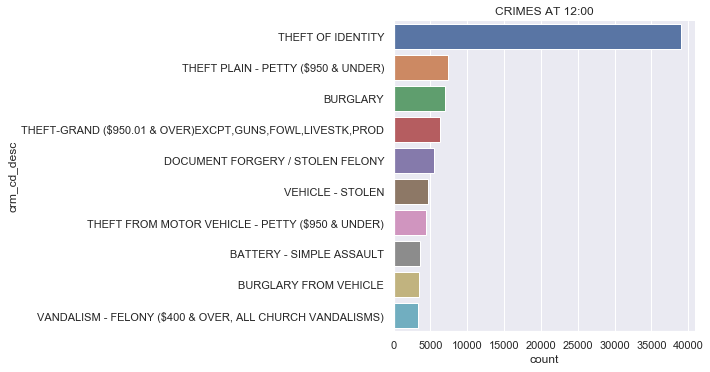

In [12]:
midday = crime_data[crime_data['time_occ'] == '12:00']
sns.catplot(y = 'crm_cd_desc',kind = 'count',
            data = midday,order = midday.crm_cd_desc.value_counts().iloc[:10].index)
plt.title("CRIMES AT 12:00")

"THEFT OF IDENTITY" is the top most crime type that occurs at 12:00 clock.Now we can investigate that on whom i.e on which victims sex these crimes occures mostly for each crime.

Text(0.5, 1, 'Crimes at 12:00 by victims sex')

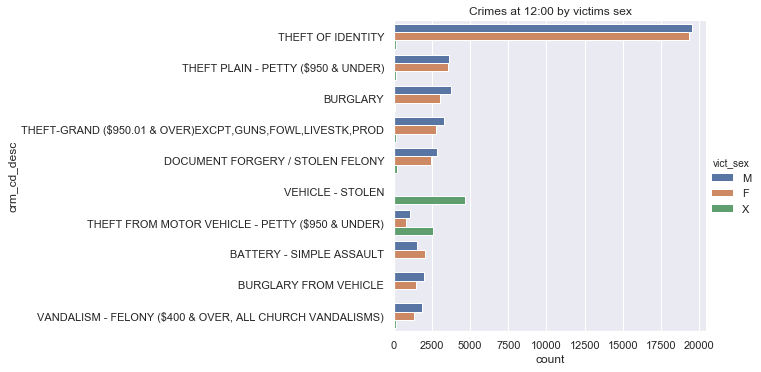

In [16]:
#crimes at 12:00 by vict_sex
midday = crime_data[crime_data['time_occ'] == '12:00']
sns.catplot(y = 'crm_cd_desc',kind = 'count',hue = 'vict_sex',
            data = midday,order = midday.crm_cd_desc.value_counts().iloc[:10].index)
plt.title("Crimes at 12:00 by victims sex")


We can confidently tell that THEFT OF IDENTITY crime at 12:00 occures mostly on males.Now lets explore the victims sex and crimes that occured on them.

#### SEX OF THE VICTIMS

Text(0.5, 1.0, 'Crimes on victim sex')

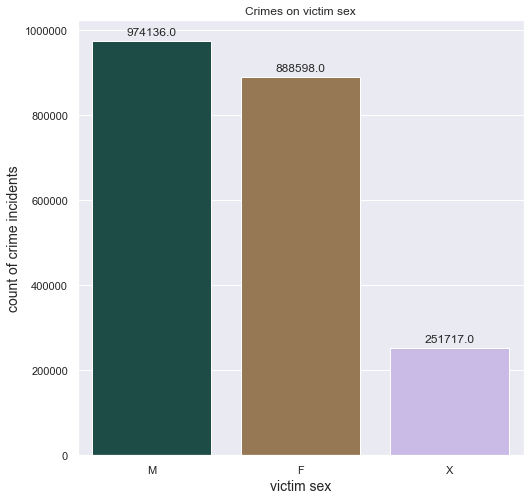

In [47]:
#Crimes on vict_sex
f, ax = plt.subplots(figsize=(8,8))
sex = crime_data.groupby('vict_sex').count().sort_values('date_occ',ascending = False)
vict_sex = list(sex.index)
crime_count = list(sex.date_occ)
splot = sns.barplot(x = vict_sex,y = crime_count,data = day,palette="cubehelix")
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.1f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')
plt.xlabel("victim sex", size=14)
plt.ylabel("count of crime incidents", size=14)
ax.set_title("Crimes on victim sex")

It is evident that most of the victims are Males.Now lets examine the top 10 crimes and their frequency among victims sex.

Text(0.5, 1, 'crimes on victims sex')

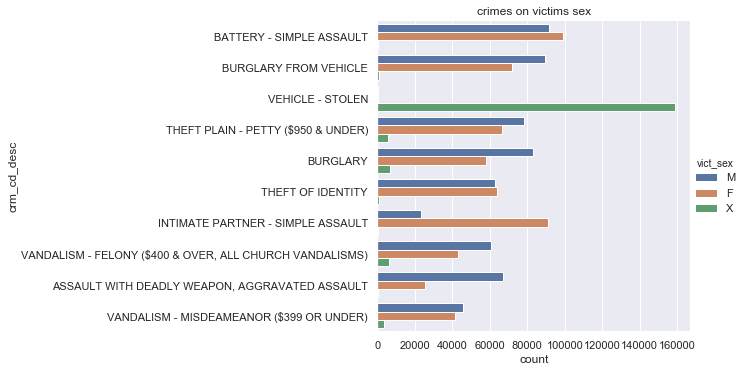

In [18]:
#Top 10 crime types on vict_sex
sns.catplot(y = 'crm_cd_desc',kind = 'count',
            data = crime_data,hue = 'vict_sex',order = crime_data['crm_cd_desc'].value_counts().iloc[:10].index)
plt.title("crimes on victims sex")

Above plot shows that females are the most victims of "BATTERY - SIMPLE ASSAULT" and "INTIMATE PARTNER - SIMPLE ASSAULT" than males.

Now lets see yearly crimes on victims sex 

(array([0, 1, 2]), <a list of 3 Text xticklabel objects>)

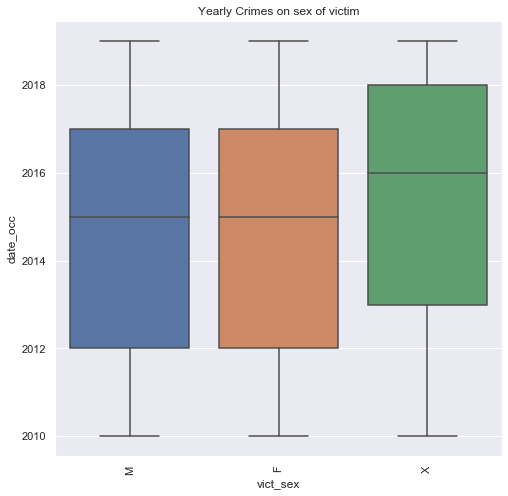

In [23]:
#Yearly crimes on vit_sex
plt.figure(figsize = (8,8))
sns.boxplot(y = pd.to_datetime(crime_data['date_occ']).dt.year,
           x = 'vict_sex',data = crime_data)
plt.title("Yearly Crimes on sex of victim")
plt.xticks(rotation = 90)

Now lets examine the victims sex and Age.

#### AGE AND SEX OF THE VICTIM

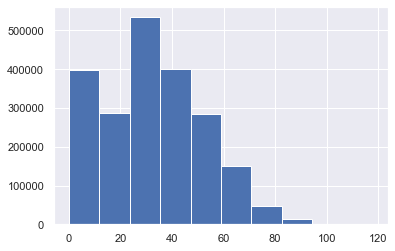

In [54]:
crime_data.vict_age.hist(bins = 10)

It is evident that most victims are of age between 25-30.

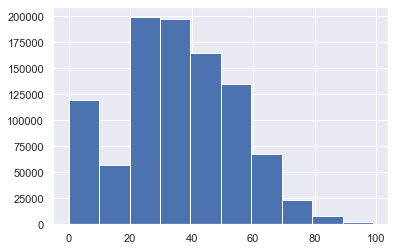

In [55]:
male = crime_data[crime_data['vict_sex'] == 'M']
male.vict_age.hist(bins=10)

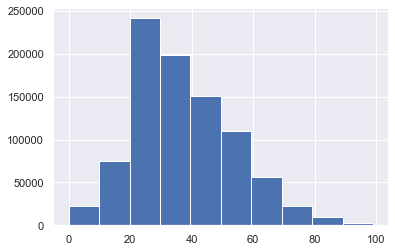

In [56]:
female = crime_data[crime_data['vict_sex'] == 'F']
female.vict_age.hist(bins =10)

Most of the male and female victims are of age between 20-40.But It is evident that female are more victimized than male in the age group of 20-40.Lets see the vict sex and their age distribution.

(array([0, 1, 2]), <a list of 3 Text xticklabel objects>)

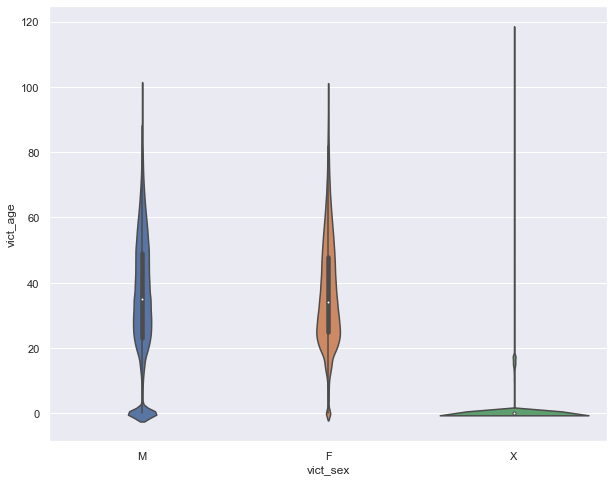

In [68]:
#victims sex and their age distribution
plt.figure(figsize = (10,8))
sns.violinplot(y = 'vict_age',
           x = 'vict_sex',data = crime_data)
plt.xticks(rotation = 0)

From the above plot most of the victims sex is between 15-70 years.Now explore the crime types on victims whose age is 70 or above. 

#### Crime types for persons of age 70 or above.

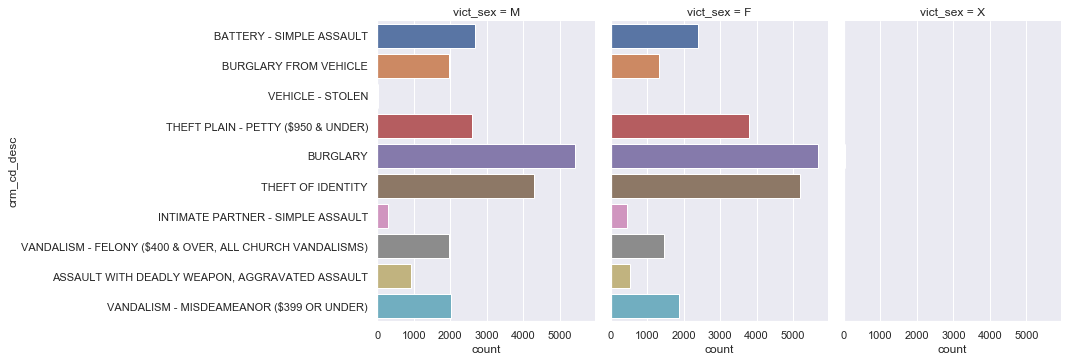

In [38]:
#crime types on victms of age >= 70
sns.catplot(y = 'crm_cd_desc',kind = 'count',
            data = crime_data[crime_data['vict_age'] >= 70],
            col = 'vict_sex',order = crime_data.crm_cd_desc.value_counts().iloc[:10].index)

BURGLARY and THEFT OF IDENTITY are the two most crime types commited with both the male and female of age 70 or above.


Lets explore how crimes occur on victims sex in LA neighborhood.

#### AREAS BY VICTIMS SEX

Text(0.5, 1, 'Areas by victims sex')

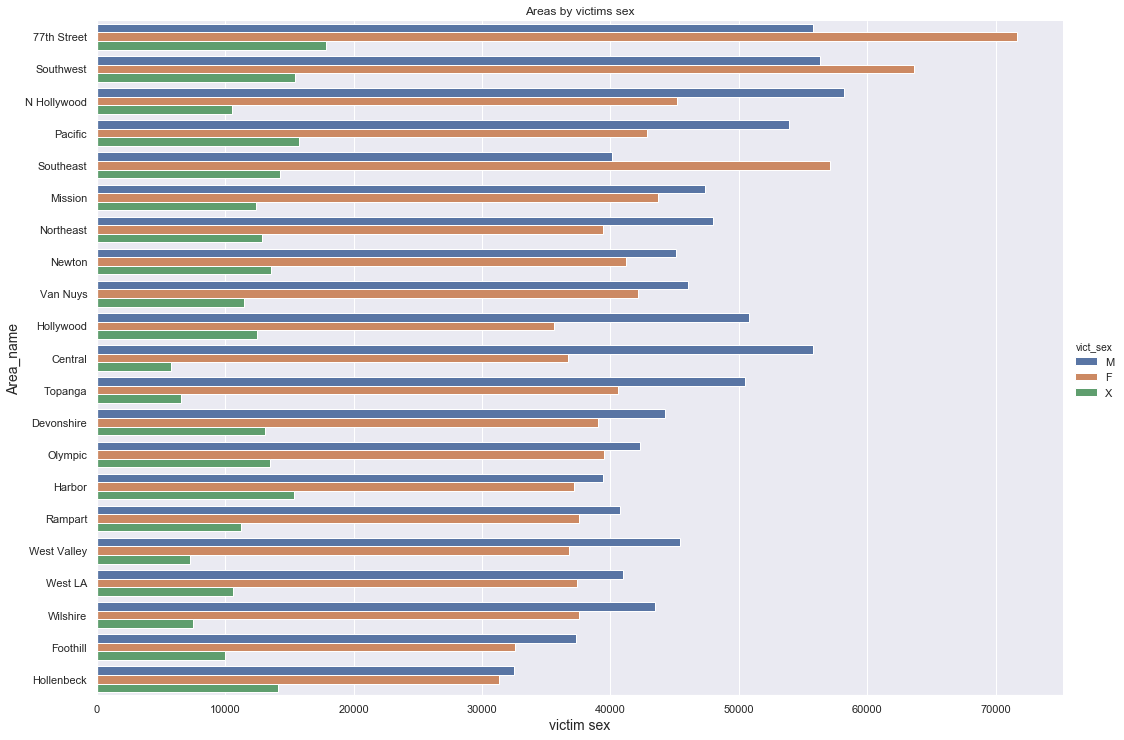

In [75]:
#Areas by victims sex
sns.catplot(y = 'area_name',kind = 'count',height=10, aspect=1.5,data = crime_data,hue = 'vict_sex',
            order = crime_data.area_name.value_counts().index)
plt.xlabel("victim sex", size=14)
plt.ylabel("Area_name", size=14)
plt.title("Areas by victims sex")

It is clearly telling us that the number one crime area 77th Street in LA has the more Female victims.Lets visualize this in stacked bars for easy grasp.

Text(0.5, 1.0, 'Areas by victims sex')

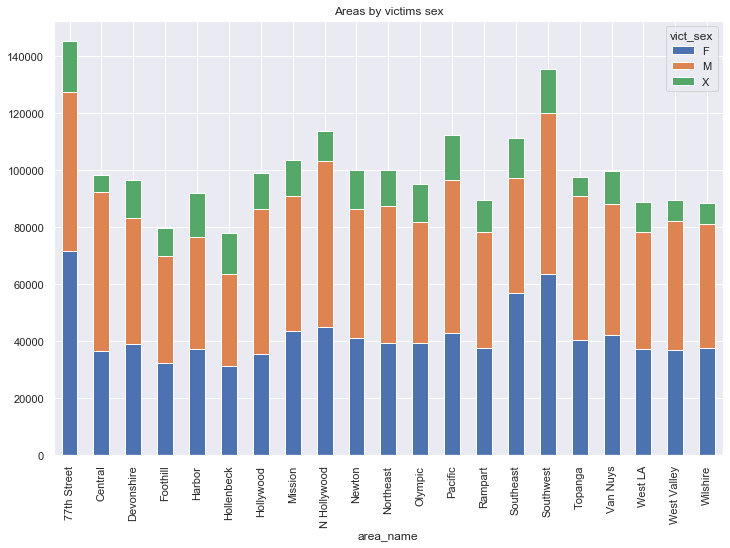

In [76]:
area_sex = crime_data.groupby(['area_name','vict_sex']).size().reset_index().pivot(columns='vict_sex', index='area_name', values=0)
area_sex.plot(kind = 'bar',stacked = True,figsize=(12,8))
plt.title("Areas by victims sex")

Above we explored so many thing likes crimes,areas and age related with victims sex.Now Lets explore one more thing victims descent on victims sex.

For that first we need to explore Victims descent.

#### VICTIM DESCENT

Text(0.5, 1, 'Victims Descent')

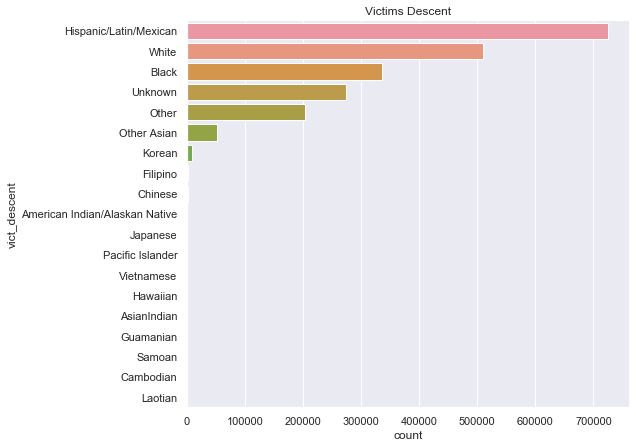

In [82]:
#Types of victim descent
sns.catplot(y = 'vict_descent',data = crime_data,
            kind = 'count',height=6, aspect=1.5,order=crime_data.vict_descent.value_counts().index)
plt.title("Victims Descent")

Hispanic/Latin/Mexican, White and Black are the top categories where victims are present.

Now lets explore this victims descent by victims sex to know which victims sex is present more in the categories of Hispanic/Latin/Mexican, White and Black.

#### VICTIM DESCENT BY SEX

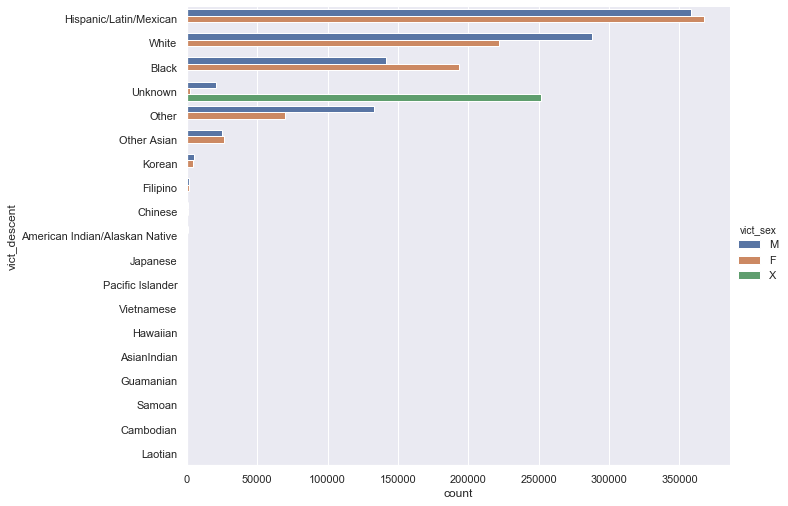

In [81]:
#Victims Descent by victims sex
sns.catplot(y = 'vict_descent',data = crime_data,kind = 'count',height=7, 
            aspect=1.5,hue ='vict_sex',order=crime_data.vict_descent.value_counts().index)
            

More Female victims are present in the categories of Hispanic/Latin/Mexican and Black. 

Now lets visualise this in stack bar chart to get a firm understanding.

Text(0.5, 1.0, 'victims descent by victims sex')

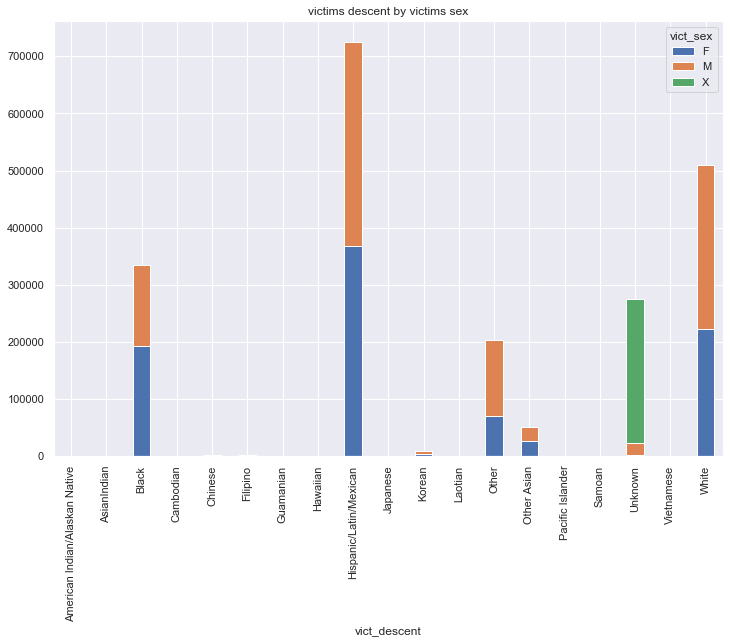

In [91]:
#Stacked bars
sex_descent = crime_data.groupby(['vict_sex','vict_descent']).size().reset_index().pivot(columns='vict_sex', index='vict_descent', values=0)
sex_descent.plot(kind = 'bar',stacked = True,figsize=(12,8))
plt.title("victims descent by victims sex")

The above plot shows us the crimes count on victims sex in victims descent categories in stacked bar presentation.


Now lets analyse a bit more on victims descent and how are the crimes distribution on them year by year.

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18]), <a list of 19 Text xticklabel objects>)

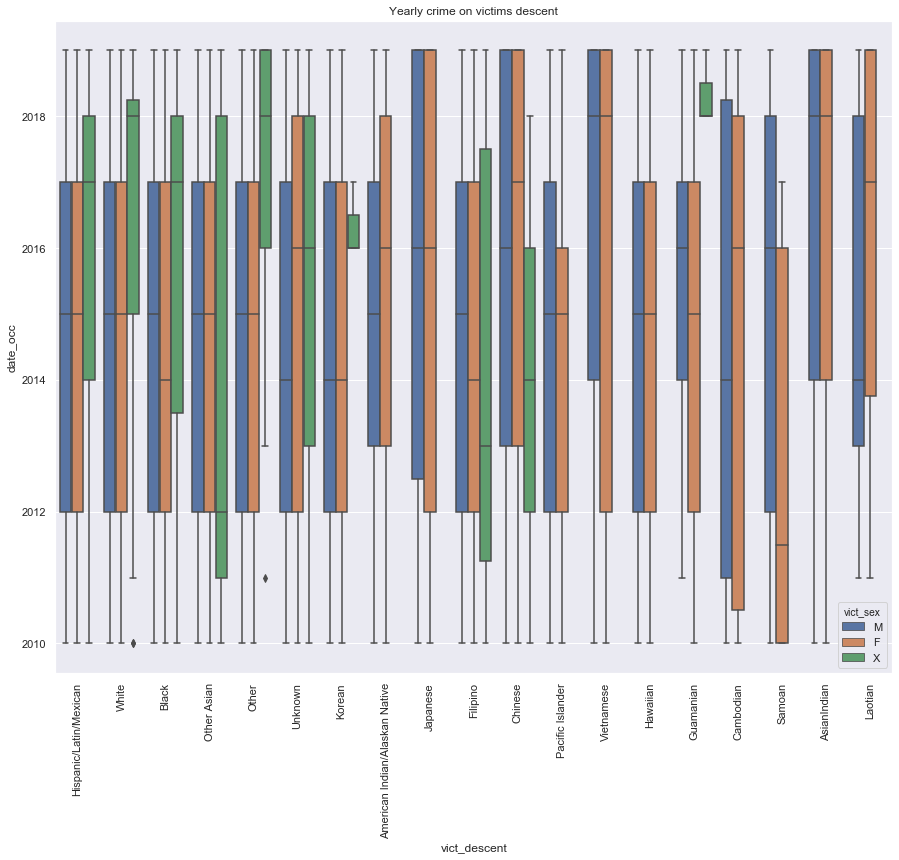

In [22]:
#Yearly crimes on vict_descent
plt.figure(figsize = (15,12))
sns.boxplot(y = pd.to_datetime(crime_data['date_occ']).dt.year,
           x = 'vict_descent',data = crime_data,hue = 'vict_sex')
plt.title("Yearly crime on victims descent")
plt.xticks(rotation = 90)

The above plot shows the yearly crimes distribution on victims descent along with the victims sex.Now lets explore Victims descent and the crimes on them in LA neiborhoods.

#### VICTIM DESCENT BY AREA

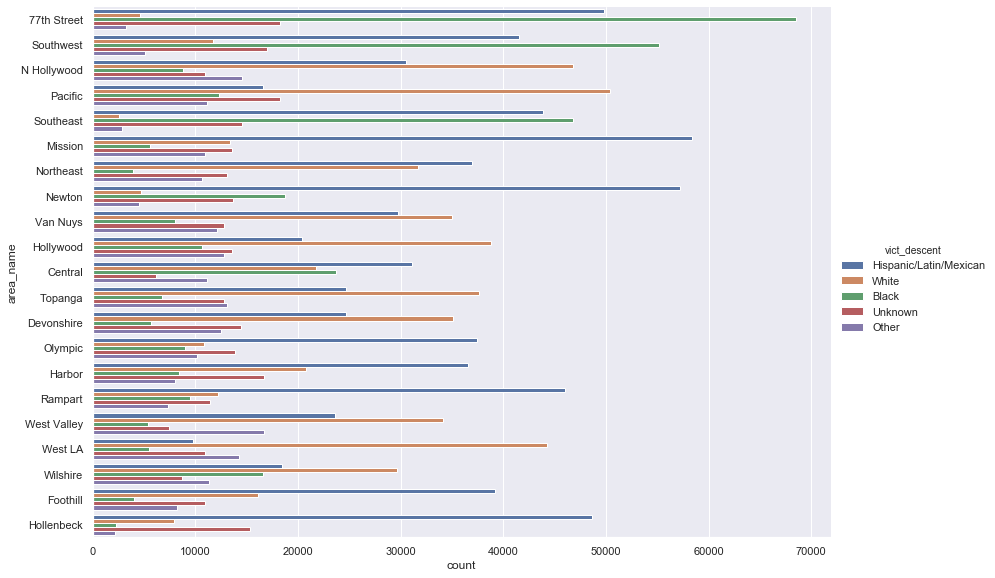

In [84]:
#Top 5 victims descents and crimes on them in LA areas.
sns.catplot(y = 'area_name',height=8, aspect=1.5,data = crime_data,
            kind = 'count', hue = 'vict_descent', order = crime_data.area_name.value_counts().index,
            hue_order = crime_data.vict_descent.value_counts().iloc[:5].index)


The above plot telling us that the Black victims are more in this top most crime areas 77th Street and Southwest in LA.Lets have a look at stacked bar chart to get a better undarstanding of how much fraction of each victims of descent present in each crime area.

Text(0.5, 1.0, 'Areas by victims descent')

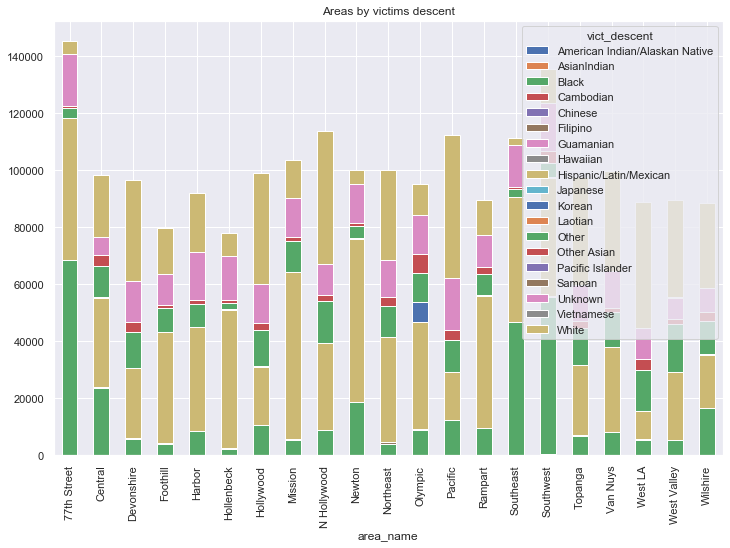

In [87]:
#Stacked bars
area_descent = crime_data.groupby(['area_name','vict_descent']).size().reset_index().pivot(columns='vict_descent', index='area_name', values=0)
area_descent.plot(kind = 'bar',stacked = True,figsize=(12,8))
plt.title("Areas by victims descent")

Criminals did different types of crimes depends on the victims descent.Now we are going to explore the crime types depends on victims descents.

#### CRIME TYPES ON VICTIM DESCENT 

Text(0.5, 1, 'CRIME TYPES ON VICTIM DESCENT')

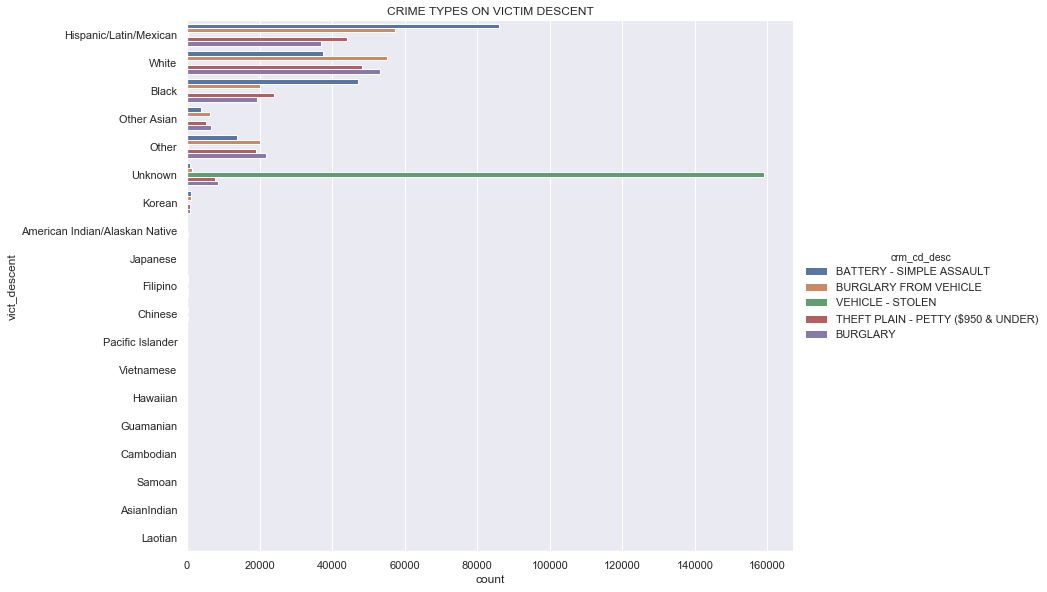

In [21]:
#Top 5 crimes types depends on victims descent
sns.catplot(y = 'vict_descent',height=8, aspect=1.5,data = crime_data,
            kind = 'count', hue = 'crm_cd_desc',
            hue_order = crime_data.crm_cd_desc.value_counts().iloc[:5].index)
plt.title("CRIME TYPES ON VICTIM DESCENT")
            

BATTERY - SIMPLE ASSAULT is the primary crime type that happende more on Hispanic/Latin/Mexican and Black and

BURGLARY FROM VEHICLE is the primary crime type on White.

Now lets dig deeper areas at which these crimes happened on victims and how they vary between victims descent.


#### CRIMES TYPES BY AREA

Text(0.5, 1, 'CRIME TYPES BY AREA')

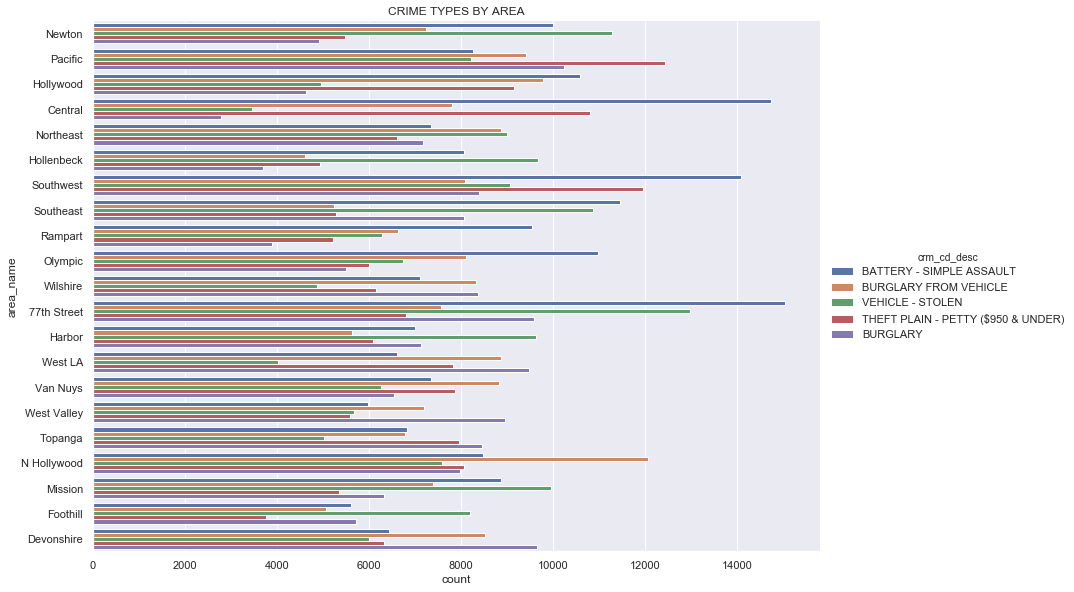

In [25]:
#Top 5 crimes types depends on victims descent
sns.catplot(y = 'area_name',height=8, aspect=1.5,data = crime_data,
            kind = 'count', hue = 'crm_cd_desc',
            hue_order = crime_data.crm_cd_desc.value_counts().iloc[:5].index)
plt.title("CRIME TYPES BY AREA")

Now dive deeper about crime tpes with respect to location and how they vary between victims descent in these LA neighborhood.

For that first we will explore the locations of crimes.

#### TYPES OF PREMISES

There are so many categories in PREMISES ,we are going to explore the top 10 premises where the crimes occur more frequently.

Text(0.5, 1, 'Premises')

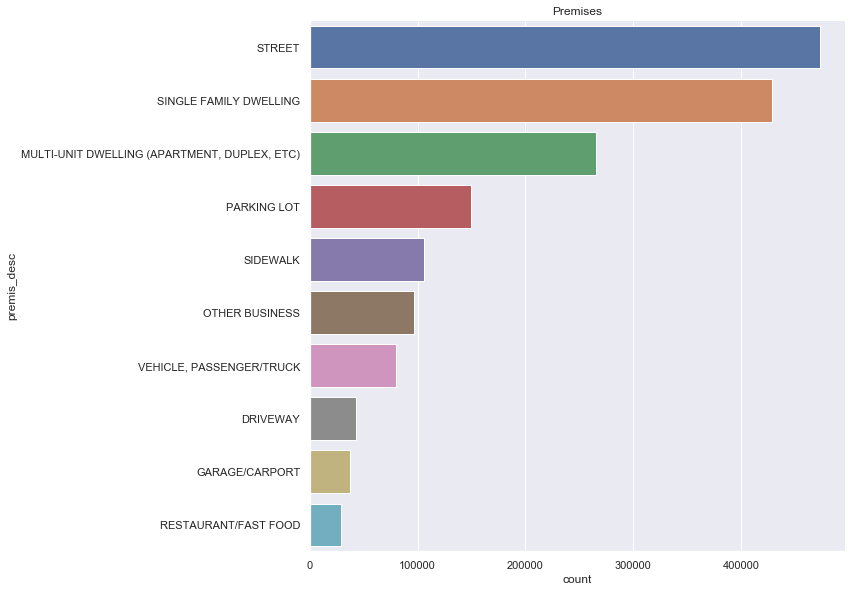

In [93]:
#Premises types
sns.catplot(y = 'premis_desc',kind = 'count',data = crime_data,height=8, 
            aspect=1.5,order = crime_data.premis_desc.value_counts().iloc[:10].index)
plt.title("Premises")

The above plot shows us that most of the crimes happend at STREET.The top 5 premises are

    STREET,
    SINGLE FAMILY DWELLING,
    MULTI-UNIT DWELLING,
    PARKING LOT and 
    SIDE WALK 
    
 Now lets see what type of crimes happend in these premises.

#### TYPES OF CRIMES AT DIFFERENT PREMISES

Text(0.5, 1, 'CRIME TYPES AT DIFFERENT PREMISES')

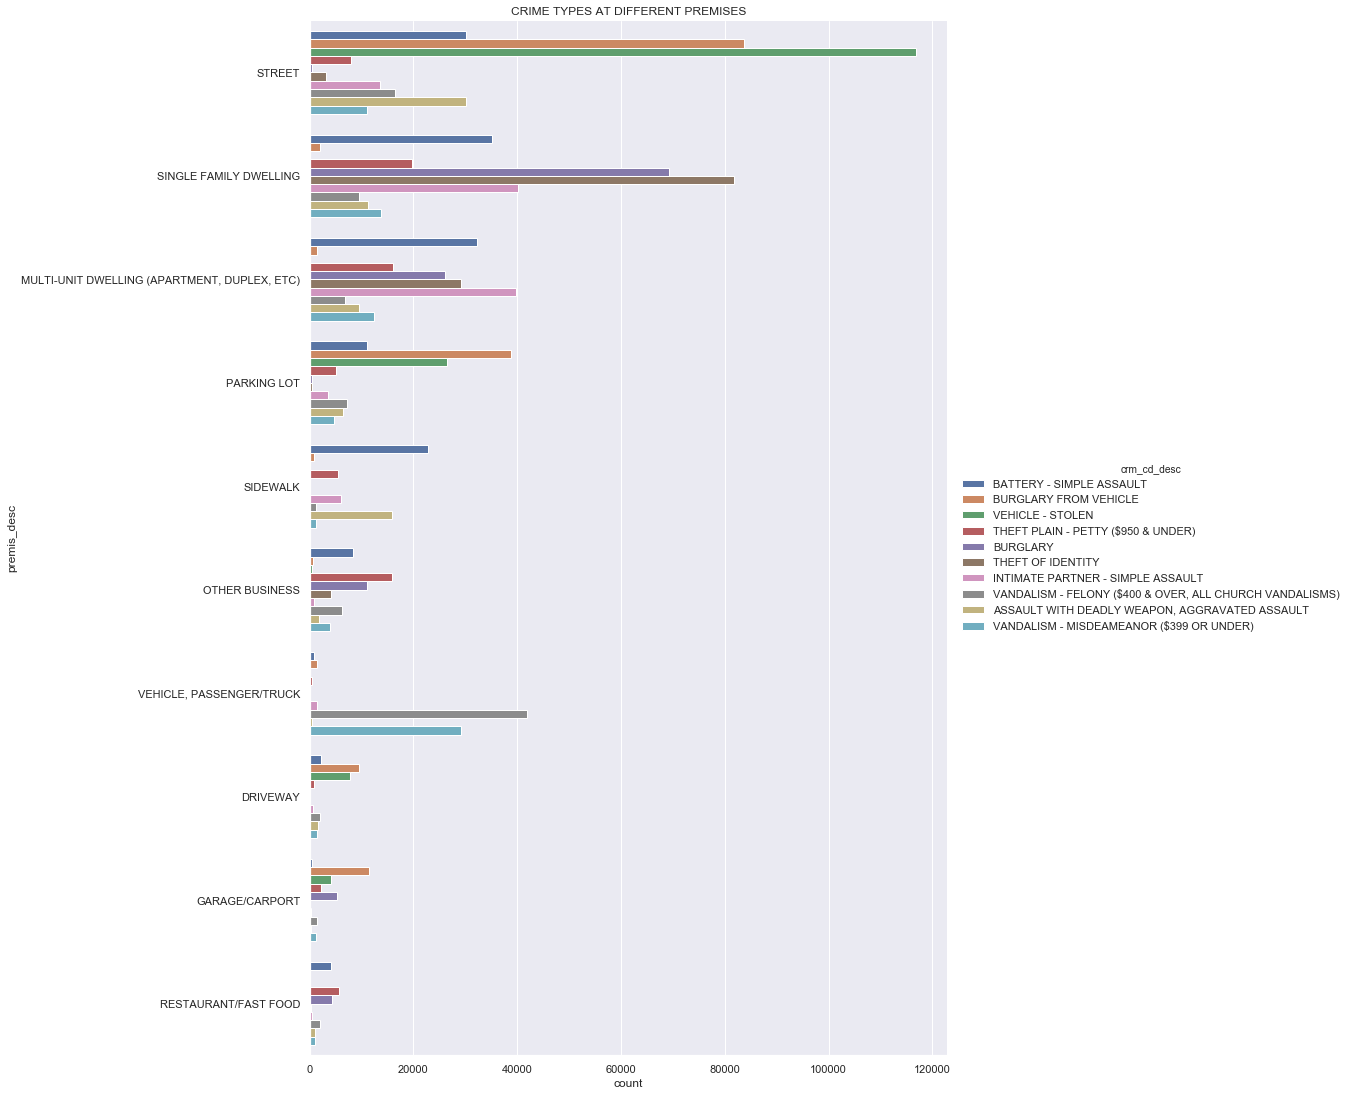

In [26]:
#Types of top 10 crimes at different premises
sns.catplot(y = 'premis_desc',kind = 'count',data = crime_data,height=15, 
            aspect=1,hue = 'crm_cd_desc',order = crime_data.premis_desc.value_counts().iloc[:10].index,
            hue_order = crime_data.crm_cd_desc.value_counts().iloc[:10].index)
plt.title("CRIME TYPES AT DIFFERENT PREMISES")          

Above plot shows very intresting details of types of crimes at different premises.

VEHICLE-STOLEN and BURGGLARY FROM VEHICLE are the top most crimes happenning at top crime location STREET.And we can draw so many conclusions from the above plot.


From the above results lets make some hypothesis that there is a relation ship between crimes and the location.

##### Now lets see how are crimes reated with location

#### Is there any relationship between crime type and location?


#### HYPOTHESIS


. Null hypothesis(H0):There is no relation ship between crime type and location.

. Alternate hypothesis(H1):There is a relation ship between crime type and location.


The Pearson’s Chi-Squared test:

    The Chi-Squared test is a statistical hypothesis test that assumes (the null hypothesis) that the observed frequencies for a categorical variable match the expected frequencies for the categorical variable. The result of the test is a test statistic that has a chi-squared distribution and can be interpreted to reject or fail to reject the assumption or null hypothesis that the observed and expected frequencies are the same.

    The chi-square test of independence works by comparing the categorically coded data that you have collected (known as the observed frequencies) with the frequencies that you would expect to get in each cell of a table by chance alone (known as the expected frequencies).
    
    If p-value <= alpha: significant result, reject null hypothesis (H0), dependent.
    If p-value > alpha: not significant result, fail to reject null hypothesis (H0), independent.



In [127]:
# chi-squared test with similar proportions
from scipy.stats import chi2_contingency
from scipy.stats import chi2
# contingency table
table = pd.crosstab(crime_data['crm_cd_desc'],crime_data['premis_desc'],margins = False) 
#print(table)
stat, p, dof, expected = chi2_contingency(table)
print('dof=%d' % dof)
print(expected)
# interpret test-statistic
prob = 0.95
critical = chi2.ppf(prob, dof)
print('probability=%.3f, critical=%.3f, stat=%.3f' % (prob, critical, stat))
if abs(stat) >= critical:
    print('Dependent (reject H0)')
else:
    print('Independent (fail to reject H0)')
# interpret p-value
alpha = 1.0 - prob
print('significance=%.3f, p=%.3f' % (alpha, p))
if p <= alpha:
    print('Dependent (reject H0)')
else:
    print('Independent (fail to reject H0)')

dof=44838
[[2.48291400e-04 1.04613443e-03 6.62110401e-05 ... 1.22490424e-04
  2.91328577e-04 4.77480916e-02]
 [1.25245276e-01 5.27700098e-01 3.33987404e-02 ... 6.17876697e-02
  1.46954458e-01 2.40855016e+01]
 [5.68587307e-02 2.39564785e-01 1.51623282e-02 ... 2.80503071e-02
  6.67142440e-02 1.09343130e+01]
 ...
 [6.85426146e-01 2.88792883e+00 1.82780306e-01 ... 3.38143565e-01
  8.04233345e-01 1.31812017e+02]
 [5.11834987e-02 2.15653141e-01 1.36489330e-02 ... 2.52505260e-02
  6.00553051e-02 9.84292802e+00]
 [6.20728501e-03 2.61533608e-02 1.65527600e-03 ... 3.06226061e-03
  7.28321441e-03 1.19370229e+00]]
probability=0.950, critical=45331.701, stat=4325092.187
Dependent (reject H0)
significance=0.050, p=0.000
Dependent (reject H0)


From above results:

        As we have rejected the H0, there is a relationship between these two variables.
        We can conclude that there is a relationship between crime and the location.

Now analyze more on which victim sex most of the crimes are occuring in these premises.

#### SEX OF VICTIMS AT DIFFERENT PREMISES

Text(0.5, 1, 'PREMISES BY VICTIM SEX')

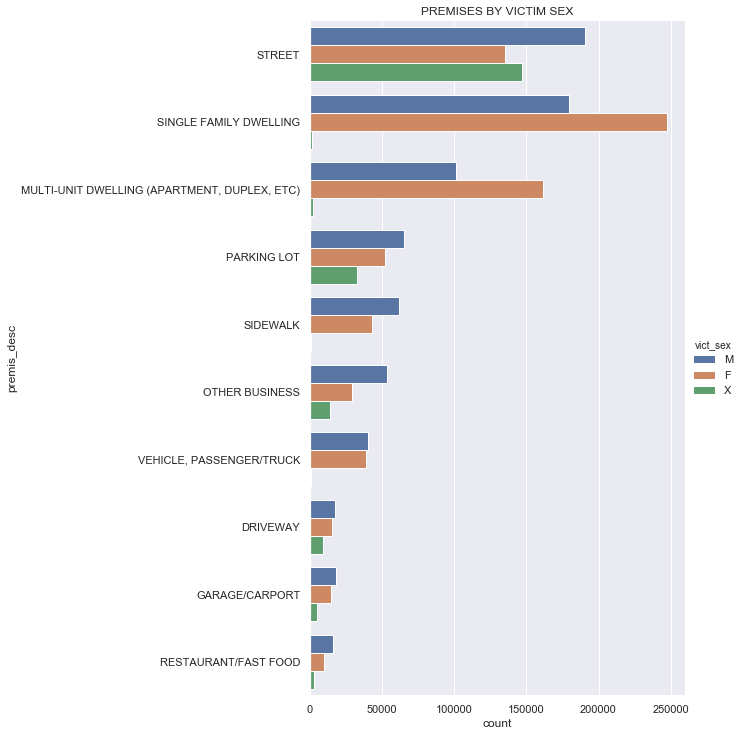

In [27]:
#Sex of Victims at different premises
sns.catplot(y = 'premis_desc',kind = 'count',data = crime_data,height=10, 
            aspect=1,hue = 'vict_sex',order = crime_data.premis_desc.value_counts().iloc[:10].index)
plt.title("PREMISES BY VICTIM SEX")            

Its shows that Crimes at STREET are happenign more on Males and more on Females at SINGLE FAMILY DWELLING.

Now lets dig deeper about the victims descents at these premises.

#### DESCENT OF VICTIMS AT DIFFERENT PREMISES

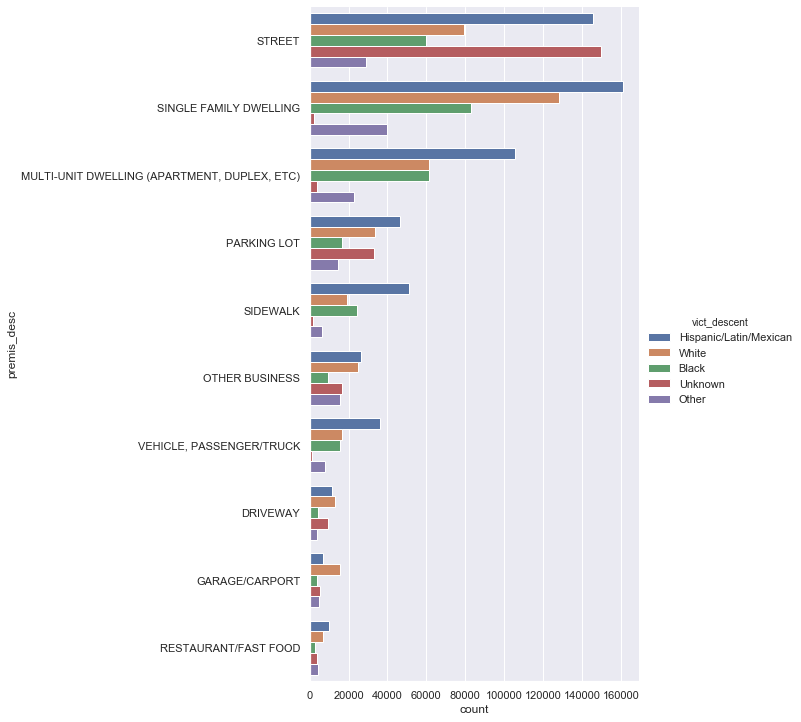

In [103]:
#Sex of Victims at different premises
sns.catplot(y = 'premis_desc',kind = 'count',data = crime_data,height=10, 
            aspect=1,hue = 'vict_descent',order = crime_data.premis_desc.value_counts().iloc[:10].index,
           hue_order = crime_data.vict_descent.value_counts().iloc[:5].index)
            

We can see clearly that crimes happend mostly on Hispanic/Latin/Mexican descent at all different locations most of the time.

As of now we drew so many insights, now lets explore more about the weapons that are used in crimes and on different sex of victms.

Now we are going to explore the weapons used in cimes.

#### WEAPONS IN CRIME

There are so many types of weapons the criminals used in the crimes.We will explore the top 10 weapons.

Text(0.5, 1, 'Top 10 weapons')

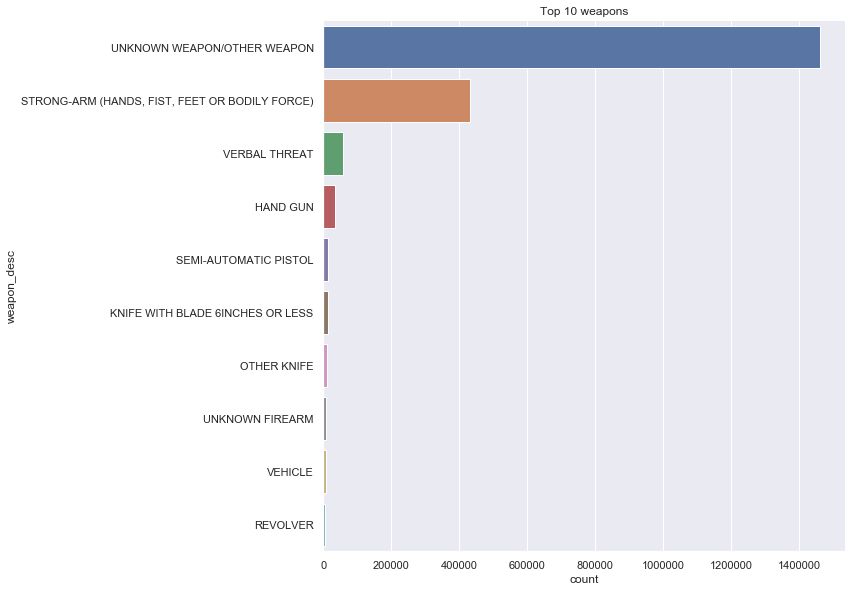

In [108]:
#Top 10 weapons used in the crimes
sns.catplot(y = 'weapon_desc',kind = 'count',data = crime_data,height = 8,
            aspect = 1.5,order = crime_data.weapon_desc.value_counts().iloc[:10].index)
plt.title("Top 10 weapons")

It is evident that criminals did not use any weapon/UNKNOWN weapon in most of the crimes.The STRONG-ARM weapon being the second most weapon used in crimes. 

Now lets see how criminal used their weapons depends on the area

#### WEAPONS USED IN CRIMES BY AREA

Text(0.5, 1, 'WEAPONS USED IN CRIMES BY AREA')

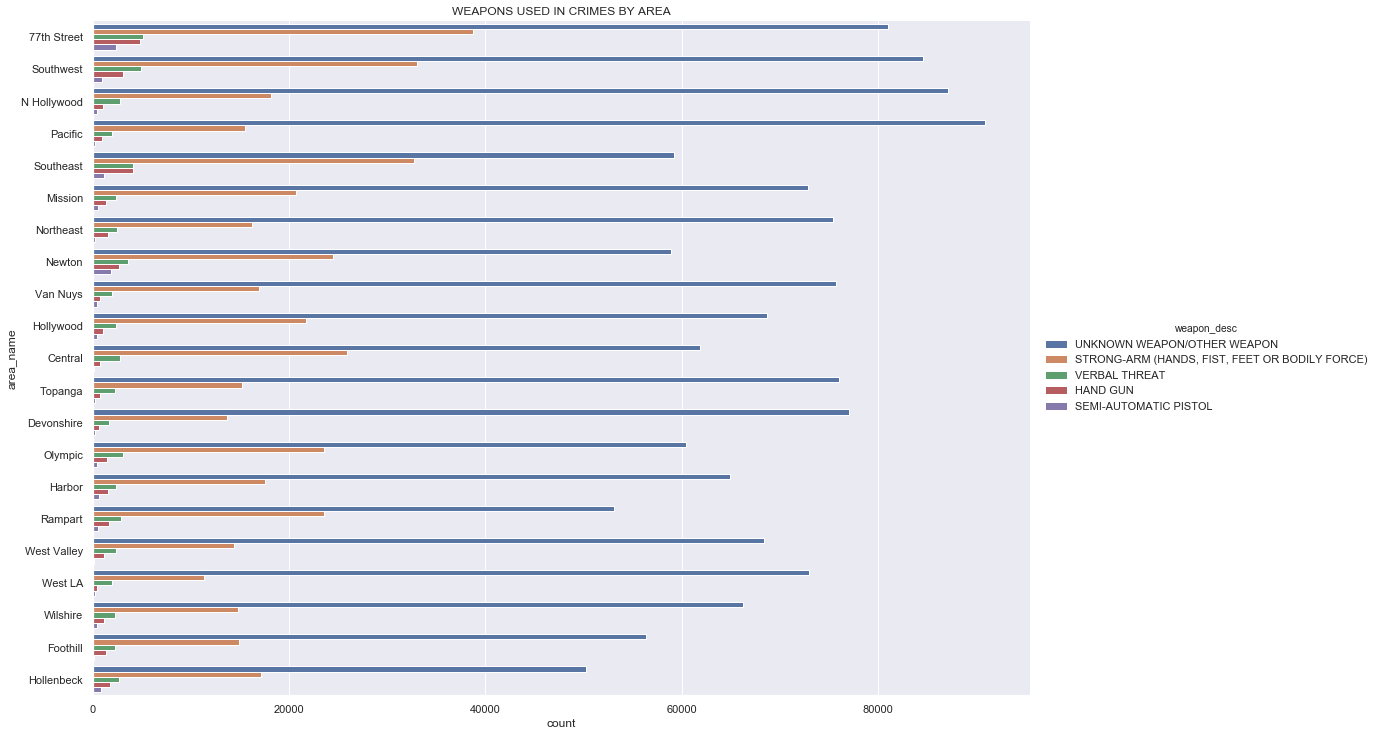

In [109]:
#Weapons by Area
sns.catplot(y = 'area_name',kind = 'count',data = crime_data,height =10,aspect = 1.5,
            hue = 'weapon_desc',order = crime_data.area_name.value_counts().iloc[:].index,
            hue_order = crime_data.weapon_desc.value_counts().iloc[:5].index)
plt.title("WEAPONS USED IN CRIMES BY AREA")

The above plots tells us that there is no weapon used in most crime in all most all areas of LA.The STRONG-ARM was being the second most weapon used in most crimes in all  the areas. 


Now we are going to explore the weapons used depends on the descent of victim.

#### WEAPONS USED IN CRIMES BY Victims descent

Text(0.5, 1, 'WEAPONS USED IN CRIMES BY VICTIM DESCENT')

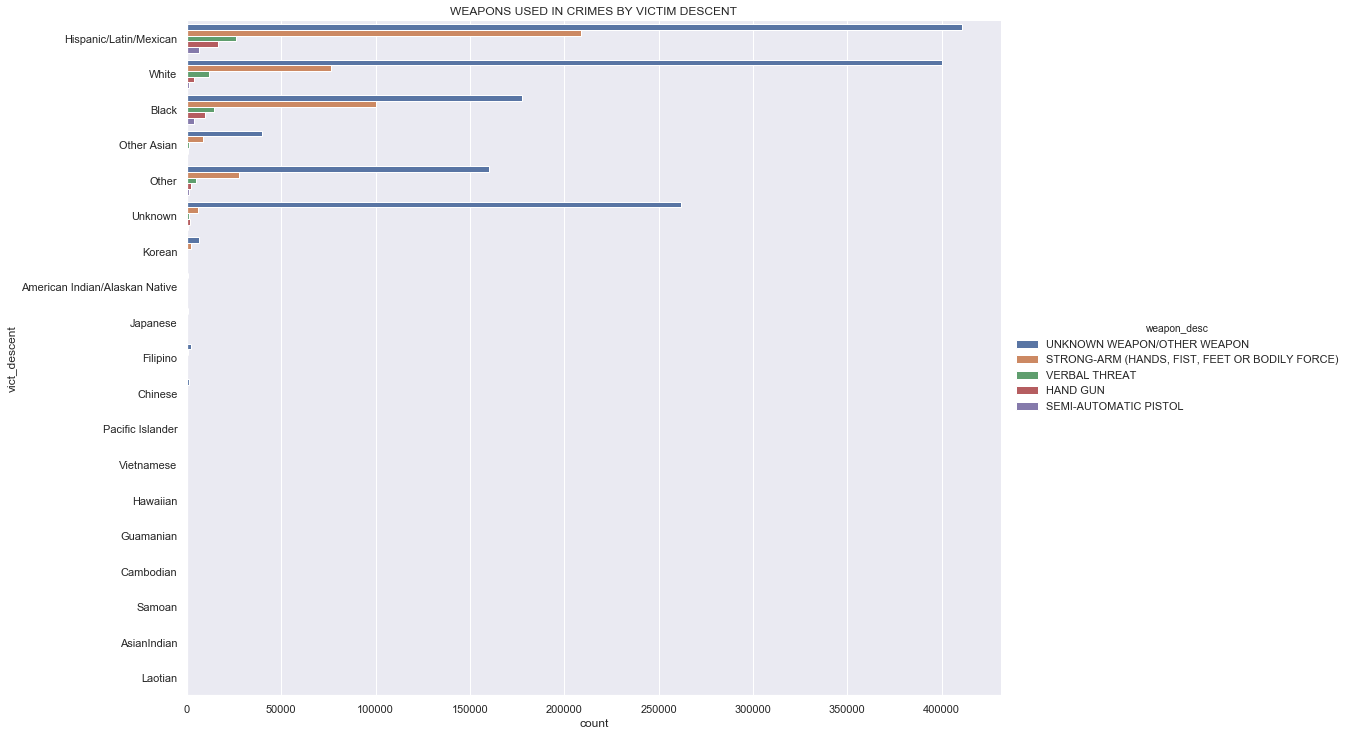

In [111]:
#Weapons by Area
sns.catplot(y = 'vict_descent',kind = 'count',data = crime_data,height =10,aspect = 1.5,
            hue = 'weapon_desc',
            hue_order = crime_data.weapon_desc.value_counts().iloc[:5].index)
plt.title("WEAPONS USED IN CRIMES BY VICTIM DESCENT")

From the above plot we can tell that criminal used UNKNOWN WEAPON/OTHER WEAPON most of the time regardless of victim descent and the area.

Now lets explore how these crimes were being reported in each district.

#### REPORTING DISTRICT CRIMES

Text(0.5, 1, 'REPORTING DISTRICT CRIMES')

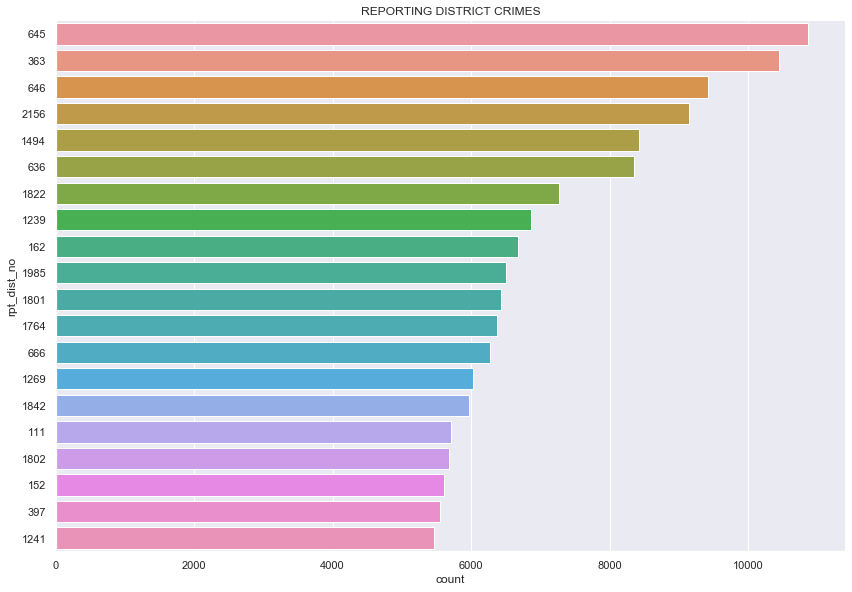

In [112]:
#Count of crimes being reported in each district
sns.catplot(y = 'rpt_dist_no',kind = 'count',data = crime_data,height = 8,
            aspect = 1.5,order = crime_data.rpt_dist_no.value_counts().iloc[:20].index)

plt.title("REPORTING DISTRICT CRIMES")
     

The above plot shows the Reporting Districts which reports the maximum number of crimes.

#### Map of the Reporting Districts

Text(0.5, 1, 'Map of the Reporting Districts')

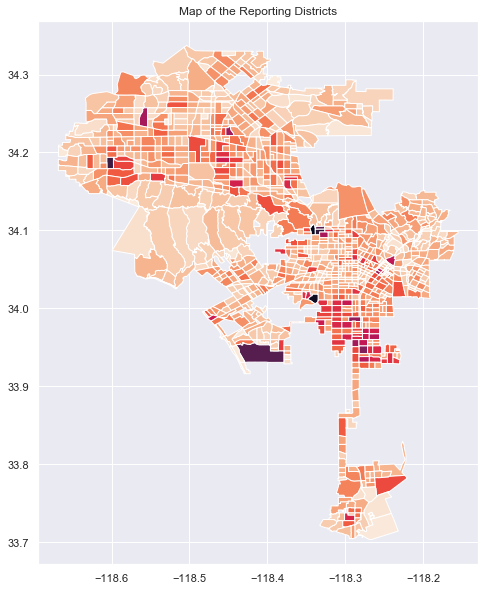

In [36]:
fig ,ax = plt.subplots(figsize = (10,10))
data1 = pd.DataFrame(crime_data.rpt_dist_no.value_counts())
merged1 = df1.set_index('REPDIST').join(data1)
merged1.plot(column = 'rpt_dist_no',cmap = 'rocket_r',ax=ax)
plt.title("Map of the Reporting Districts")

#### MAP OF THE NUMBER OF REPORTING DISTRICTS YEAR BY YEAR

In [116]:
def plot_report_density(crimeyear):
    year = pd.to_datetime(crime_data['date_occ']).dt.year
    data = pd.DataFrame(crime_data[year == crimeyear].rpt_dist_no.value_counts())
    #data = pd.DataFrame(crime_data[year == crimeyear].groupby('rpt_dist_no').agg({'lat': 'median','lon':'median'}))
    #data.index = map(lambda x: str(x).upper(), data.index)
    merged = df1.set_index('REPDIST').join(data)
    fig, ax = plt.subplots(figsize = (15,8))

    xlim = ([merged.total_bounds[0],  merged.total_bounds[2]])
    ylim = ([merged.total_bounds[1],  merged.total_bounds[3]])

    ax.set_xlim(xlim)
    ax.set_ylim(ylim)

    merged.plot(column = 'rpt_dist_no',ax = ax,legend = True,cmap="rocket_r")

    ax.set(title='LOSANGELES')
    ax.set_axis_off()

    plt.show()
    print("The highest 5 reporting dist:", data.head())
    print("The lowest 5 reporting dist:", data.tail())
    
from ipywidgets import interact,widgets
interact(plot_report_density,crimeyear = widgets.IntSlider(min = 2010,max = 2019,step=1,value=2015))

interactive(children=(IntSlider(value=2015, description='crimeyear', max=2019, min=2010), Output()), _dom_clas…

<function __main__.plot_report_density(crimeyear)>

From above map we can see the top 5 and least 5 reporting districts with their crime reporting counts.

Now we are going to explore the top 5 districts along with their top 20 crime types.

#### REPORTING DISTRICT WITH THEIR TYPE OF CRIMES

Text(0.5, 1, 'REPORTING DISTRICT WITH THEIR TYPE OF CRIMES')

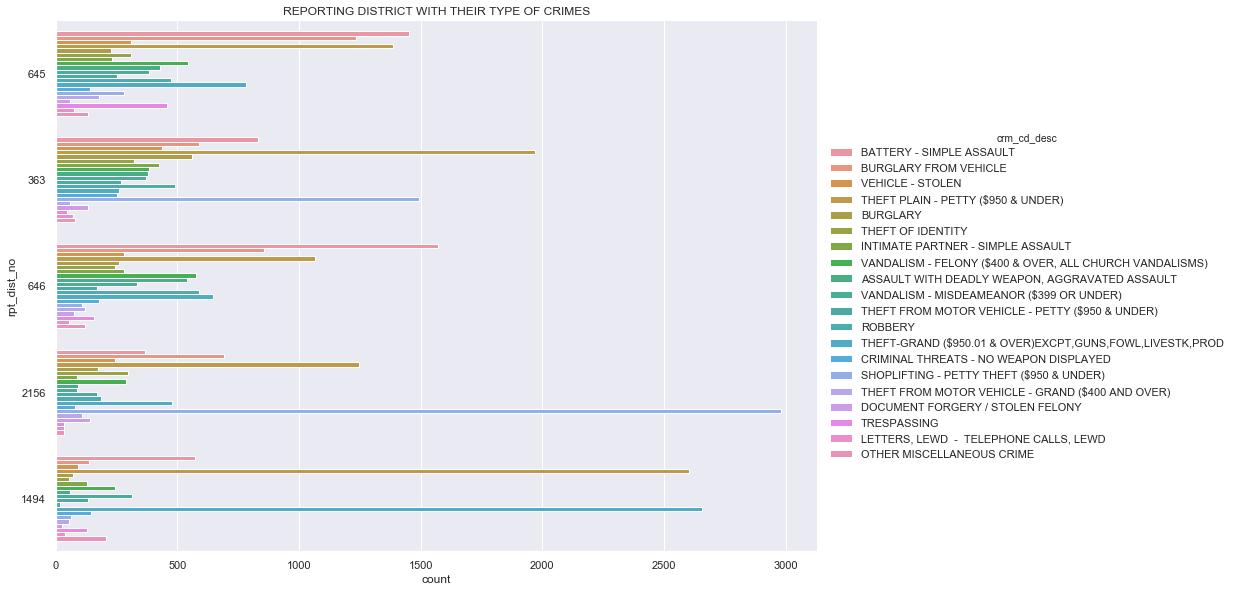

In [118]:
sns.catplot(y = 'rpt_dist_no',kind = 'count',
            data = crime_data,height = 8,aspect = 1.5,
            hue = 'crm_cd_desc',
            hue_order = crime_data.crm_cd_desc.value_counts().iloc[:20].index,
            order = crime_data.rpt_dist_no.value_counts().iloc[:5].index)
plt.title("REPORTING DISTRICT WITH THEIR TYPE OF CRIMES")     

We can draw so many insights from the above plot.

Now lets visualize how these variables relate to each other by pairplots.

#### Explore data relationships

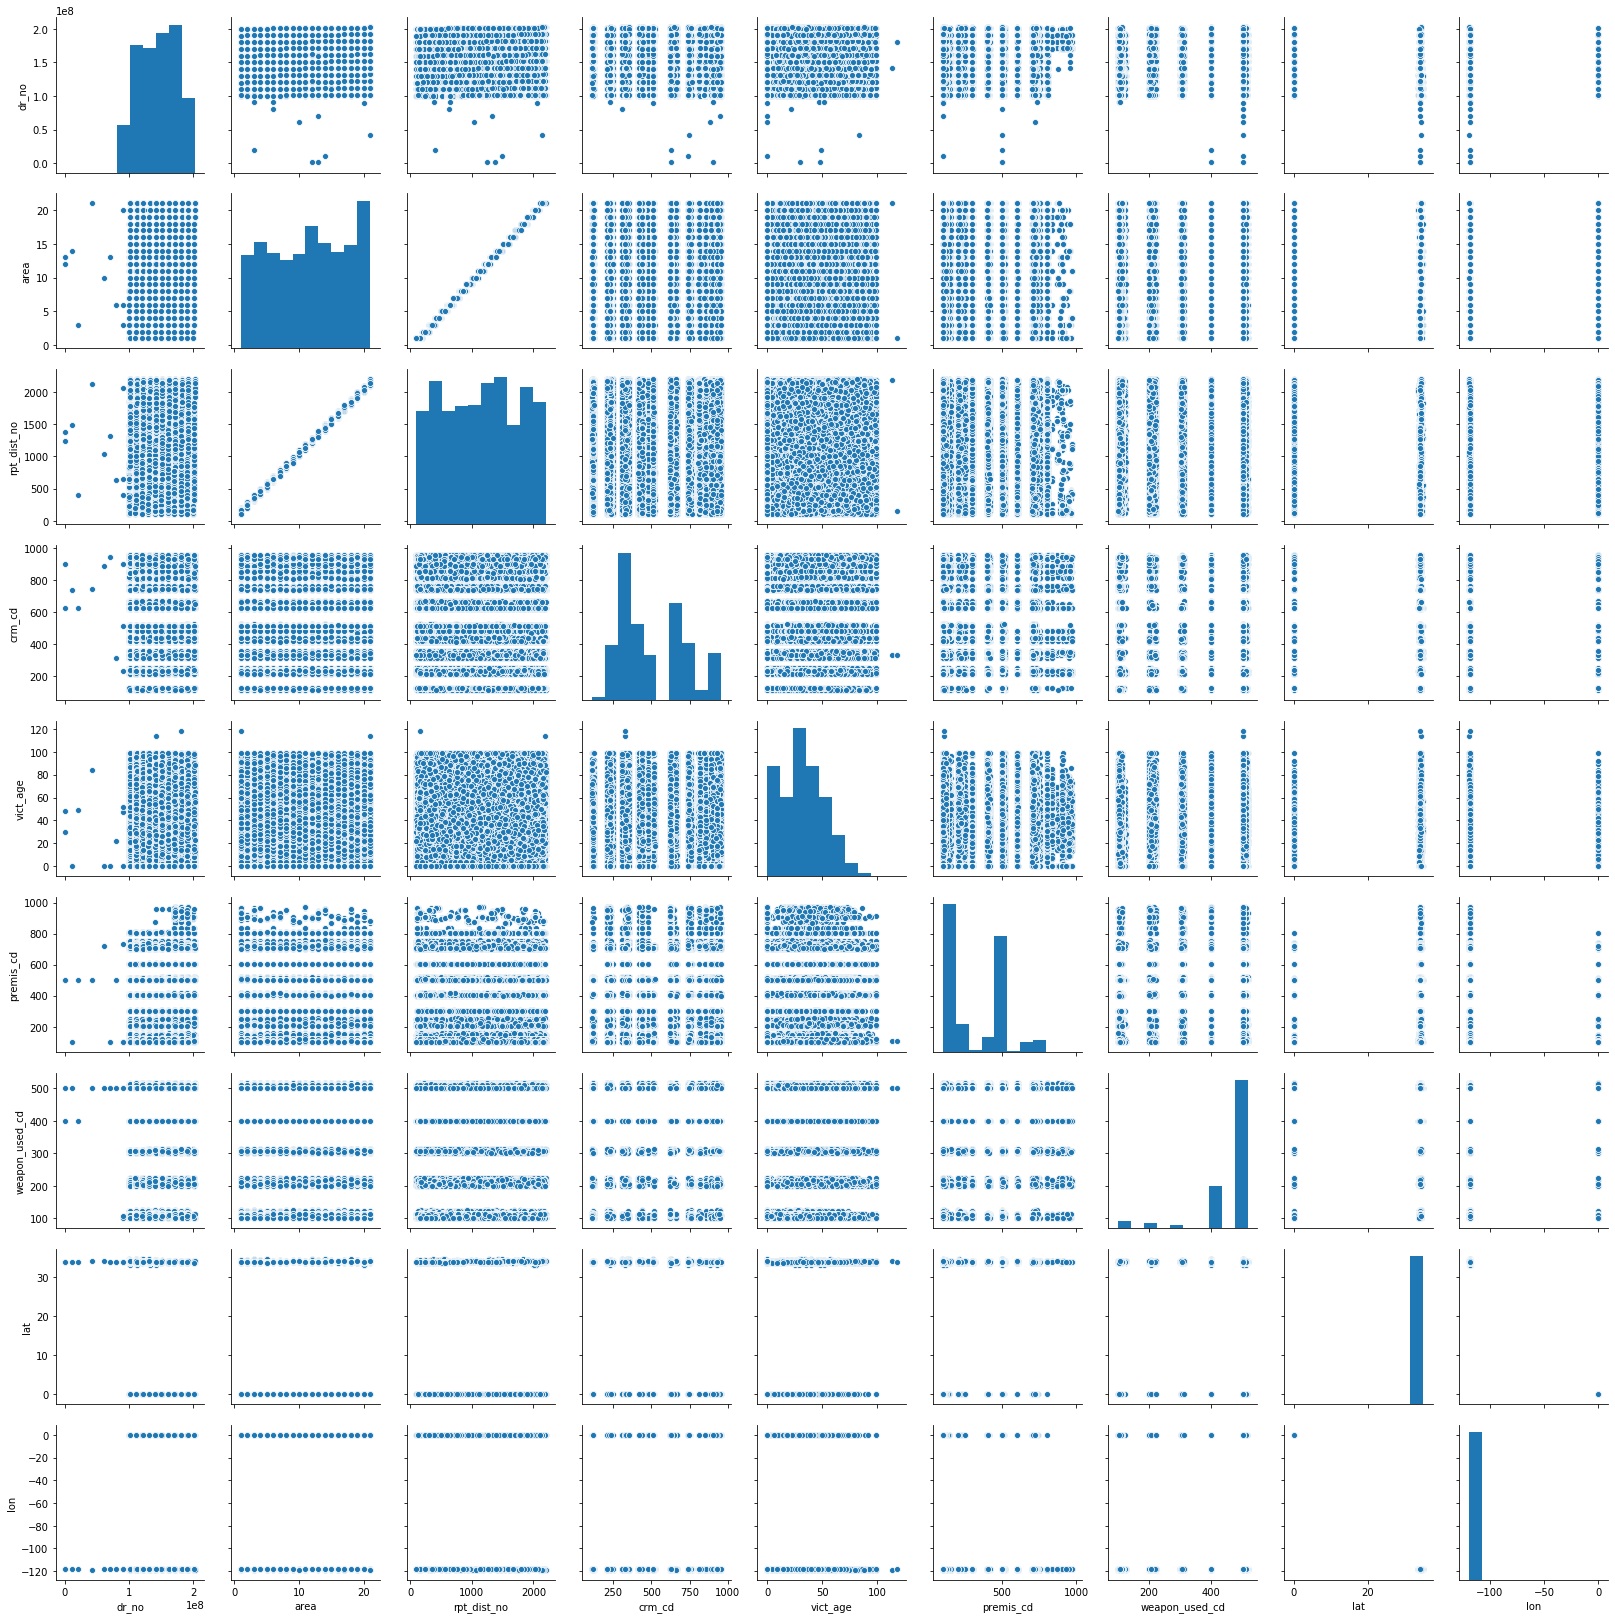

In [3]:
#pairplots
sns.pairplot(crime_data)

#### Create a Pearson correlation heatmap

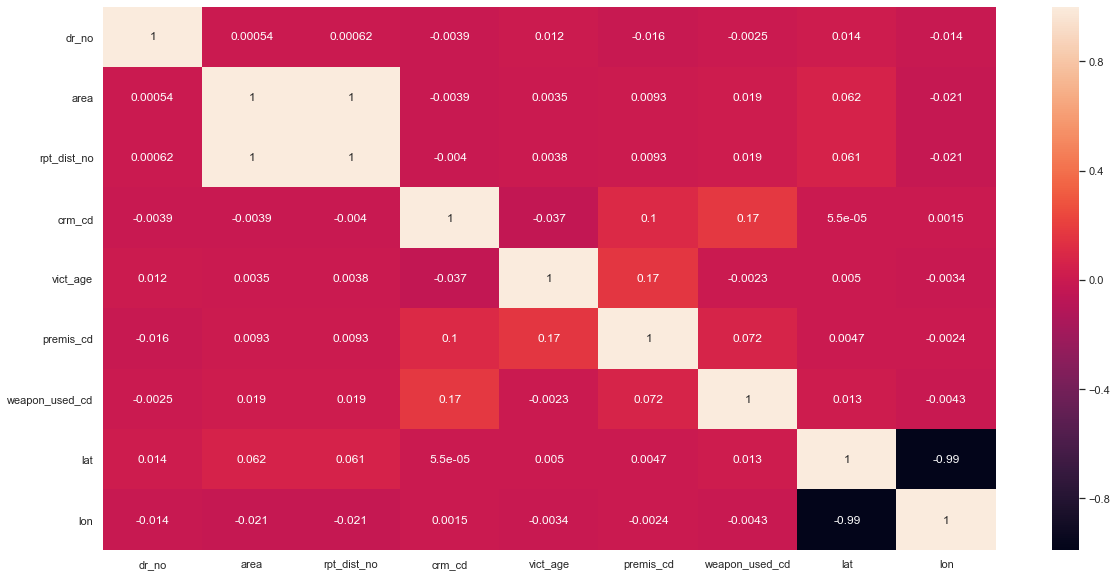

In [129]:
#Heatmap
plt.figure(figsize = (20,10))
sns.heatmap(crime_data.corr(),annot = True)

Use the correlation matrix displayed in the heatmap to select and remove collinear features. Remember to exclude the response variable(s) from the matrix to ensure they are retained in your final model development dataset. Then select those features that are more than 95% correlated for removal.


In [131]:
# Call the variable corr_matrix
corr_matrix= crime_data.drop(['crm_cd','mocodes'], axis=1).corr().abs()

# Get the upper triangle of the correlation matrix 
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

# This code iterates through our columns and gets the index of any that have a correlation > 0.95
# Call the variable to_drop, get the columns of our 'upper' variable, make sure the threshold is 0.95.
to_drop = [column for column in upper.columns if any(upper[column] > 0.95)]

In [132]:
# Let's see those features! 
print('Features selected to drop include:',to_drop)

Features selected to drop include: ['rpt_dist_no', 'lon']


In [133]:
print('Reduced dataframe size: ',crime_data.drop(crime_data[to_drop], axis=1).shape)

Reduced dataframe size:  (2114451, 22)
